# Proyecto Final Comunicaciones Digitales

### Alumnos:

$\bullet$ Bejarano, Kevin Matias

$\bullet$ Daniel, Tomas Gaston

### Profesores:

$\bullet$ Graciela Corral Briones

$\bullet$ J. Martin Ayarde

## Frequency Shift Chirp Modulation

**Frequency Shift Chirp Modulation** (FSCM) es la técnica de modulación utilizada por los sistemas LoRa, utilizada mayoritariamente para redes de área amplia y baja potencia (LPWAN).


La FSCM se basa en señales de **chirp**, que son sinusoides cuya frecuencia varía linealmente en el tiempo.

- Un *up-chirp* es una señal cuya frecuencia instantánea aumenta con el tiempo.
- Un *down-chirp* es una señal cuya frecuencia instantánea disminuye.

La característica distintiva de la modulación LoRa es que la información no se codifica en la forma del chirp en sí, sino en su **frecuencia inicial**.

## Parametros de la modulación y simbolos LoRa

 **Spreading Factor (SF)** 

Es un parámetro en la modulación LoRa que determina la cantidad de muestras por simbolo y el tiempo que demora un simbolo en enviarse.

Un SF alto implica que cada simbolo se transmite usando mas muestras (por lo que aumenta el tiempo de simbolo), esto hace que sea mas facil distinguir un simbolo enviado del ruido por lo que indirectamente aumenta el alcance de la señal. Como consecuencia de esto, disminuimos la cantidad de informacion transmitida por segundo (ya que ahora los simbolos demoran mas tiempo). 

Un SF pequeño hace que cada simbolo se transmita usando menos muestras (disminuye el tiempo de simbolo) y esto mejora la cantidad de informacion transmitida por segundo pero al ser tan pequeño el tiempo de un simbolo hace que sea mas facil confundir la señal con ruido, por lo que se disminuye el alcance.

SF tipicamente toma valores enteros entre 7 y 12 para balancear la relacion alcance/tasa de envio de datos.

**Ancho de Banda (BW)**

Define el rango de frecuencias que la señal chirp barre durante un simbolo. La frecuencia de muestreo $f_s$ se establece con el valor de $f_s=BW$.



**Tiempo de simbolo (Ts):**

Es el tiempo (periodo) que tarda en enviarse un símbolo, esta definido por:

  \begin{equation}
 T_s =2^{SF}.T = \frac {2^{SF}}{BW}
 \end{equation}

donde:
- $T_s$ es el tiempo que demora en enviarse un simbolo.
- $SF$ es el spreading factor
- $BW$ es el ancho de banda de la señal
- $T$ es el tiempo de muestreo

**Tiempo de muestreo:**

 Esta definido por:

  \begin{equation}
 T = \frac{1}{BW}
 \end{equation}

 Indica cada cuanto tiempo se toma una muestra de nuestra señal, sabiendo que la cantidad de muestras por simbolo es de $2^{SF}$. Al aumentar el ancho de banda, reducimos el tiempo de muestreo con lo cual tambien reduce el tiempo de simbolo y aceleramos la transmision. Es decir, el costo de reducir el tiempo de muestreo es aumentar el ancho de banda.

 Al definir al tiempo de muestreo  como $T=\frac{1}{Bw}$, se corresponde a la tasa de muestreo de Nyquist de una señal con un ancho de banda BW.


**Simbolos:**

En LoRa, un símbolo corresponde a una combinación específica de bits, y cada símbolo modula un chirp de una manera que depende de esos bits.

Los simbolos utilizados para la transmisión estan limitados por el SF mediante la siguiente formula $2^{SF}-1$

Por lo que el simbolo que puedo elegir para enviar se encuentra en el rango de: {0,...,(2^SF) -1}



## Modulación

Para realizar la modulación primero necesitamos un encoder que permita convertir palabras binarias a valores decimales. El encoder se define en el paper de la siguiente manera:

$$
s(nT_s) = \sum_{h=0}^{SF-1}w(nT_s)_h2^h
$$
donde $w(nT_s)$ es la palabra binaria de entrada compuesta por $SF$ bits, correspondiente a un símbolo a transmitir y $s(nT_s)$ es la palabra códificada en decimal que corresponde a dicha hipótesis.

Una vez obtenido el valor decimal mediante el encoder, usamos este valor como entrada del modulador. En la FSCM, el símbolo obtenido $s(nT_s)$ determina el desplazamiento en frecuencia que debemos aplicar a una señal chirp base.

El modulador genera una señal compleja de duración $T_s$ que varía linealmente en frecuencia con el tiempo (Chirp). Se define matemáticamente de la siguiente manera:

 $$
c(nT_s + kT) = \frac{1}{\sqrt{2^{SF}}}e^{j2\pi[|s(nT_s)+k|_{mod 2^{SF}}]\frac{k.T.Bw}{2^{SF}}}
 $$


El factor de normalizacion: $\frac{1}{\sqrt{2^{SF}}}$ representa la amplitud de la señal. La magnitud de una señal compleja siempre es 1, entonces la magnitud de una muestra de la señal se determina con $(\frac{1}{\sqrt{2^{SF}}})^2= \frac {1}{2^{SF}}$.

Si queremos obtener la energia total del simbolo, tenemos que sumar la magnitud de cada una de las muestras, lo que serian $2^{SF}$ veces, por lo que al final el termino se simplifica y nos queda una energia del simbolo unitaria.

Si eligieramos un $T$ menor que $1/Bw$, esto implicaria un oversampling (sobremuestreo). El tiempo de muestreo disminuye por lo que quedaria definido como $T=\frac{1}{n*Bw}$ con $n>1$. Tendriamos mas muestras lo que puede ser de ayuda en contextos de mucho ruido ya que las muestras capturadas no son suficientes. Estos beneficios los obtenemos a cambio de mayor costo computacional que se puede relacionar con mayor consumo de potencia para el transmisor.


Como se definió que $T=\frac{1}{BW}$, se puede simplificar a la siguiente formula
 $$
c(nT_s + kT) = \frac{1}{\sqrt{2^{SF}}}e^{j2\pi[|s(nT_s)+k|_{mod 2^{SF}}]\frac{k}{2^{SF}}}
 $$

para $k=0 ... 2^{SF}-1$

El exponente determina la fase instantanea de la señal y por lo tanto, su frecuencia instantanea. 
El valor $s(nTs)$ representa el punto de partida (ordenada al origen) de nuestra función.


El cociente $\frac{k}{2^{SF}}$ representa la fracción del tiempo de símbolo que transcurrió, que va desde 0 hasta casi 1 al final. Además $k$ al multiplicarse convierte a la fase instantanea en una función cuadrática y $\frac {1}{2^{SF}}$ asegura que la rampa de frecuencia instantanea cubra exactamente el ancho de banda en el tiempo de simbolo $T_S$

Sabiendo que la frecuencia instantanea es la derivada de la fase instantanea, entonces para lograr una frecuencia instantanea lineal, debemos tener una fase instantanea cuadratica. Si desarrollamos tomando a $s(nT_s)=m$.

$$
c(nT_s + kT) = e^{j2\pi \frac{|m+k|k}{2^{SF}}}
 $$

El módulo asegura que siempre tengamos que: $m+k < 2^{SF}$


$$
c(nT_s + kT) = e^{j2\pi \frac{mk+k^2}{2^{SF}}}
 $$


Tomando a la fase instantanea como: $\phi[k]=2\pi \frac {mk+k^2}{2^{SF}}​$


 Y como la derivada se define matematicamente como:
 $$
 f[k]=\frac {1}{2 \pi} (\phi [k] - \phi [k-1])
 $$

$$
(\phi [k] - \phi [k-1])=2\pi (\frac {mk+k^2}{s^{SF}} - \frac {mk-m+k^2-2k+1}{s^{SF}}) = 2\pi \frac {m+2k-1}{2^{SF}}
$$

 Esto nos queda entonces:

$$
  f[k]=\frac {1}{2 \pi} (\phi [k] - \phi [k-1]) = \frac {m-1+2k}{2^{SF}}
$$

 Donde $s(nT_s)=m$ representa el simbolo que vamos a transmitir, aqui se puede ver de forma mas clara que se trata de la ordenada al origen y que representa el desplazamiento inicial de frecuencia.



## Simulación

### Importación de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import resample_poly
from scipy.signal import resample
from IPython.display import display, clear_output

### Funciones para Graficar

In [2]:
# Función para graficar señales en el tiempo
def plot_waveform(title, xlabel, ylabel, tiempo, signal):
    plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(tiempo,signal)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

# Funcion para graficar variacion de frecuencia
def plot_frequency_variation(title, xlabel, ylabel, tiempo, freq):
    plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(tiempo,freq)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

#Funcion para graficar espectograma
def plot_spectrogram(input_signal, fs,osf=1, title='Espectrograma'):

    # Frecuencia de muestreo efectiva
    fs_efectiva = fs * osf
    
    # Escalar parámetros de la STFT con OSF
    nperseg = 32    # Longitud de ventana
    noverlap = 28  # Solapamiento
    nfft = 128       # Puntos de la FFT
    
    # Calcular STFT
    f, t, Zxx = signal.stft(
        input_signal, 
        fs=fs_efectiva,      
        nperseg=nperseg,     
        noverlap=noverlap,   
        return_onesided=False,
        nfft=nfft,
        window='hann'           
    )
    
    # Centrar el espectro en 0 Hz (fftshift)
    f = np.fft.fftshift(f)
    Zxx = np.fft.fftshift(Zxx, axes=0)
    
    # Graficar
    plt.figure(figsize=(20, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
    plt.colorbar(label='Magnitud')
    plt.title(title, fontsize=16)
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    plt.ylim(-fs/2, fs/2)  
    plt.show()

# Función para graficar las correlaciones obtenidas
def plot_probabilidad(titulo, eje_x, eje_y, simbolo, corr, osf=1, normalize=True, zero_padding_factor=1):
    plt.figure(figsize=(20, 4))

    # Si es un solo simbolo, lo transformamos a listas para procesar igual
    if not isinstance(simbolo, (list, tuple, np.ndarray)):
        simbolo = [simbolo]
        corr = [corr]

    # Graficamos todas las correlaciones
    for s, c in zip(simbolo, corr):
        c_abs = np.abs(c)
        
        # Crear eje X escalado según zero-padding
        if zero_padding_factor > 1:
            x_axis = np.arange(len(c_abs)) / zero_padding_factor
        else:
            x_axis = np.arange(len(c_abs))
        
        if normalize and np.max(c_abs) > 0:
            plt.plot(x_axis, c_abs / np.max(c_abs))
        else:
            plt.plot(x_axis, c_abs)

    # Marcamos los símbolos de referencia, escalando su posición correctamente
    for s in simbolo:
        if zero_padding_factor > 1:
            # Si hay zero-padding, el símbolo ya viene en escala de FFT, lo dividimos
            posicion_real = np.real(s) / zero_padding_factor * osf
        else:
            posicion_real = np.real(s) * osf
        plt.axvline(posicion_real, color='r', linestyle='--')

    # Para evitar leyendas duplicadas
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.title(titulo)
    plt.grid(True)
    plt.show()



def plot_ber(snr_range, ber_values):
    plt.figure(figsize=(10, 6))
    plt.semilogy(snr_range, ber_values, 'b-o', linewidth=2, markersize=6)
    # Grid para escala logarítmica
    plt.grid(True, which="both", ls="--")
    # Forzar que se muestren todos los valores de SNR en el eje X
    plt.xticks(snr_range)
    plt.xlabel('SNR [dB]')
    plt.ylabel('BER')
    plt.title('Curva BER vs SNR - LoRa FSCM')
    plt.ylim([1e-5, 0.1])
    plt.show()


def analizar_y_visualizar(espectro, freqs, bw, sf, simbolo):
    fft_magnitud = np.abs(np.fft.fftshift(espectro))
    freq_axis_shifted = np.fft.fftshift(freqs)
    plt.figure(figsize=(10, 6))
    plt.plot(freq_axis_shifted / 1000, fft_magnitud, 'k-')
    plt.title("FFT", fontsize=16)
    plt.xlabel('Frecuencia (kHz)'); plt.ylabel('abs.FFT')
    plt.xlim(-bw/1000, bw/1000); plt.grid(True)
    plt.show()


def plot_fft(fft_magnitud, titulo="FFT", osf=2, zero_padding_factor=4):
    plt.figure(figsize=(16, 4))
    plt.stem(np.arange(len(fft_magnitud)), fft_magnitud, basefmt=" ")
    plt.title(f'{titulo} (OSF={osf}, ZP={zero_padding_factor})', fontsize=12, fontweight='bold')
    plt.xlabel('Bin')
    plt.ylabel('abs.FFT')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Generador de Hipotesis Binarias

La función utiliza `np.random.randint(0, 2, size=n)`, que genera una secuencia de ceros y unos. El modelo de probabilidad que subyace a esta función es la **distribución uniforme discreta**.

Esto significa que cada bit generado tiene:
*   Una probabilidad del 50% de ser '0'.
*   Una probabilidad del 50% de ser '1'.

Cada bit es un evento independiente y equiprobable.


In [3]:
def generador_hipotesis(n):
    # Hipotesis binarias
    return np.random.randint(0, 2, size=n)

### Encoder

El enconder toma una palabra binaria y la codifica a un valor decimal.

El encoder_vector, toma un vector w que tiene muchas palabras binarias, las agrupa en funcion del valor de SF. Y da como resultado un conjunto de valores decimales

In [4]:
def encoder(w):
    w = np.asarray(w, dtype=int)
    # Producto punto con pesos decrecientes (MSB a LSB)
    pesos = 2**np.arange(len(w)-1, -1, -1)
    simbolo = int(np.dot(w, pesos))
    return simbolo

def encoder_vector(w, sf):
    w = np.asarray(w, dtype=int)
    padding_size = (sf - len(w) % sf) % sf
    
    if padding_size > 0:
        w_completa = np.concatenate((np.zeros(padding_size, dtype=int), w))
    else:
        w_completa = w
    
    # Reshape en matriz de (n_grupos, sf) y codificar todos a la vez
    grupos = w_completa.reshape(-1, sf)
    pesos = 2**np.arange(sf-1, -1, -1)
    simbolos = np.dot(grupos, pesos).astype(int)
    
    return simbolos, w_completa

In [5]:
def waveform_simbolo(s, sf, bw, direction='up', osf=1):
    
    M = 2**sf               # Número de símbolos posibles
    M_os = M                # SIEMPRE usa M muestras (OSF=1 en transmisor)
    k = np.arange(M_os)     # Índice de muestras
    
    modulo=(s+k)%M
    fase = (k/M)
    
    # Generar chirp
    if direction == 'down':
        c = (1 / np.sqrt(M_os)) * np.exp(-1j * 2 * np.pi * modulo * fase)
        # Frecuencia instantánea: derivada de la fase
        freq_norm = (-s / M_os - k / M_os) % 1.0
        freq = freq_norm * bw
    else:  # 'up'
        c = (1 / np.sqrt(M_os)) * np.exp(1j * 2 * np.pi * modulo * fase)
        # Frecuencia instantánea: derivada de la fase
        freq_norm = (s / M_os + k / M_os) % 1.0
        freq = freq_norm * bw
    
    # Vector de tiempo (siempre con BW, sin osf)
    tiempo = k / bw
    c_normalizado = c / np.max(np.abs(c))

    return c_normalizado, freq, tiempo

def waveform_paquete(simbolos, sf, bw, osf=1):
    
    M = 2**sf
    simbolos = np.asarray(simbolos, dtype=int)
    
    chirp_list = []
    freq_list = []
    
    # Generar cada chirp y concatenar (SIEMPRE con OSF=1)
    for simbolo in simbolos:
        c, freq, _ = waveform_simbolo(int(simbolo), sf, bw, direction='up', osf=1)
        chirp_list.append(c)
        freq_list.append(freq)
    
    if len(chirp_list) == 0:
        return np.array([], dtype=complex), np.array([]), np.array([])
    
    # Concatenar todos los chirps
    chirp_paquete = np.concatenate(chirp_list)
    freq_paquete = np.concatenate(freq_list)
    
    # Vector de tiempo del paquete completo (siempre con OSF=1)
    num_simbolos = len(simbolos)
    tiempo = np.linspace(0, M/bw * num_simbolos, M * num_simbolos)
    
    return chirp_paquete, freq_paquete, tiempo


def resample_signal_rx(signal, osf_target):
    
    from scipy.signal import resample
    
    # Resample sin ajuste de energía (para hardware real)
    new_len = len(signal) * osf_target
    signal_resampled = resample(signal, new_len)
    
    return signal_resampled 



## Demodulación

El proceso de demodulación en el receptor LoRa está diseñado para ser robusto y eficiente, aprovechando la estructura única de los símbolos chirp. El objetivo es determinar el símbolo original a partir de la señal recibida $r(t)$, que en un caso ideal de un canal sin ruido es igual a la señal transmitida $c(t)$. Definimos como ruido blanco de media cero y varianza $\sigma^2$, esta varianza es independiente del simbolo y la muestra que enviamos, ya que el ruido se suma de la misma manera en todas las señales.

$$
    r(nT_s+kT)=c(nT_s+kT)+w(nT_s+kT)
$$



### Demodulación Optima

Primero debemos tener en cuenta una propiedad de esta modulacion FSCM y es que todas las waveform son ortogonales entre si, es decir, dado dos simbolos $c_i$ y $c_q$ se comprueba que:
$$
\left<c(nT_s + kT)_{s(nT_s)=i},c^*(nT_s + kT)_{s(nT_s)=q}\right> = 0 \qquad i \neq q, i,q \in \{0,...,2^{SF}-1\}$$

$$\left<c(nT_s + kT)_{s(nT_s)=i},c^*(nT_s + kT)_{s(nT_s)=q}\right> = 1 \qquad i = q, i,q \in \{0,...,2^{SF}-1\}$$

Esta demostración se realiza en el paper, para comprobar esta propiedad de ortogonalidad, mediante la simulación vemos el resultado de dos Waveform de distintos simbolos que al ser ortogonales su producto interno es nulo.

Para realizar la demodulación se propone primero el método mas optimo ,aunque no muy eficiente computacionalmente, que consiste en comparar a la señal recibida $r(nT_s+kT)$ con cada una de las bases posibles (simbolos) que van desde $q=0$ hasta $q=2^{SF}-1$. 

Usamos un test de hipótesis de máxima verosimilitud (ML), donde calculamos el producto interno entre la señal recibida y cada base $c_q[nT_s+kT]$ y elegimos el símbolo que maximiza la magnitud de esta correlación.

Esto significa que comparamos cada uno de los valores de muestra determinados por el indice relacionado $k$ con cada uno de los valores de muestra de todas las posibles bases que se pudieron enviar

Las bases se definen de la siguiente manera:

\begin{equation}
c_q[nT_s+kT] = \frac{1}{\sqrt{2^{SF}}}e^{j2\pi[|q+k|_{mod 2^{SF}}]\frac{k}{2^{SF}}}
 \end{equation}

donde $k=0,...,2^{SF}-1$

Y el detector ML se define de la siguiente manera:

$$
\hat{q}_{ML} = \arg\max_{q \in \{0,\dots, 2^{SF}-1\}} 
\left| \sum_{k=0}^{2^{SF}-1} r[nT_s+kT] \, c_q^*[nT_s+kT] \right|^2
$$

En un canal ideal sin ruido, debido a la propiedad de la ortogonalidad entre los simbolos el resultado de todos los productos internos de simbolos distintos es cero y cuando encontramos el simbolo es uno. Sin embargo, al agregar ruido blanco esto ya no se cumple ya que ahora todos los resultados tienen algun valor de correlación distinto de cero por lo que es importante elegir el mayor de todos esos para encontrar la mejor estimación.


In [6]:
def ml_detector(received, sf, bw):
    M = 2**sf                    # Número de símbolos posibles (bases)
    correlacion = np.zeros(M, dtype=float)     # creo un vector para guardar valores de correlación
    for q in range(M):
        c_q, _,_ = waveform_simbolo(q,sf, bw)
        producto_punto = np.vdot(c_q, received)  # se debe conjugar a la base, ya que se trata de señales complejas. Esto lo hace vdot automaticamente
        correlacion[q] = np.abs(producto_punto)**2  
    simbolo_probable = np.argmax(correlacion)   #Elegimos el que maximice el argumento que representa la mejor estimación del símbolo transmitido
    return simbolo_probable, correlacion



### Demodulación con Implementación Computacionalmente Eficiente


Ahora vamos a desarrollar el "truco matematico". En un principio deberiamos hacer la proyección entre la señal recibida $r(nT_s+kT)$ con cada una de los simbolos bases c(nT_s+kT). 

Para calcular esa proyeccion elegimos un simbolo base cualquiera (recordando que al trabajar con señales complejas debemos aplicar el conjugado a alguna), para hacer mas legible las operaciones consideramos que $M=2^{SF}$
:

$$\left<r(nT_s+kT),c_q^*(nT_s+kT)\right> \quad,  \qquad q \in 0,...,M-1$$

Reemplazamos por su equivalente al trabajar con señales discretas
$$\sum_{k=0}^{M-1} r(nT_s+kT).c_q^*(nT_s+kT)  $$

Reemplazamos el equivalente del simbolo base que ya lo tenemos definido de antes. Hasta aqui este método es exactamente el mismo que el anterior.
$$\sum_{k=0}^{M-1} r(nT_s+kT). \left( \frac{1}{\sqrt{M}}e^{-j2\pi[|q+k|mod_M]\frac{k}{M}}\right)$$

Ahora, si nos concentramos solamente en $c_q^*$ y lo redefinimos agregando $+k-k$ en el exponente
$$c_q^*=\frac{1}{\sqrt{M}}e^{-j2\pi[|q+k|mod_M+k-k]\frac{k}{M}}$$

Aplicando la propiedad de los exponentes podemos separarlo de la siguiente manera: tomamos la exponencial considerando solamente el argumento "+k" y aplicandole distributiva queda de la siguiente manera. Notamos que la primera exponencial es una señal que se da cuando $q=0$, por lo que la podemos definir como chirp base. 
$$c_q^*=\frac{1}{\sqrt{M}}\left(e^{-j2\pi\frac{k^2}{M}}\right) .\left(e^{-j2\pi[|q+k|mod_M-k]\frac{k}{M}}\right) $$

Para la segunda exponencial debemos tener considerar que mientras que $k+q<M$, entonces el modulo no va a modificar el resultado y la exponencial quedaria definida de la siguiente manera:
$$e^{-j2\pi[q+k-k]\frac{k}{M}}=e^{-j2\pi \frac{q.k}{M}}$$

En caso contrario se da que $k+q\geq M$, por lo que queda definido de la siguiente manera:
$$e^{-j2\pi[q+k-M-k]\frac{k}{M}}=e^{-j2\pi[q-M]\frac{k}{M}}=e^{j2\pi kM}. e^{-j2\pi \frac{q.k}{M}}$$

Por definición, tenemos que $e^{j2\pi kM}=1$ ya que se puede escribir de la siguiente manera 
$$ e^{-j2\pi k.M} = \cos(2\pi k.M) - j\sin(2\pi k.M) $$

Donde $cos(2\pi k.M) = 1$ , $sin(2\pi k.M) = 0 $ para cualquier valor de $k\in0,...,M-1$ y para cualquier valor entero de $M$ debido a la periodicidad de la exponencial compleja para enteros. 

Notamos que para $\left(q+k\geq M\right)$ o $\left(q+k<M\right)$ la ecuación queda definida de la siguiente manera:
$$c_q^*=\frac{1}{\sqrt{M}} \left(e^{-j2\pi\frac{k^2}{M}}\right) .\left(e^{-j2\pi \frac{q.k}{M}}\right) $$

Y finalmente reescribimos la proyección
$$\left<r(nT_s+kT),c_q^*(nT_s+kT)\right>=\frac{1}{\sqrt{M}} \sum_{k=0}^{M-1} r(nT_s+kT).\left(e^{-j2\pi\frac{k^2}{M}}\right) .\left(e^{-j2\pi \frac{q.k}{M}}\right)$$

Definimos a $d(nT_s+kT)=r(nT_s+kT).\left(e^{-j2\pi\frac{k^2}{M}}\right)$, para desarrollar aun mas esto vamos a tomar un simbolo enviado $q$ por lo que queda de la siguiente manera:

$$d(nT_s+kT)=\frac{1}{\sqrt{M}}e^{j2\pi(|q+k|\frac{k}{M})} . \left(e^{-j2\pi\frac{k^2}{M}}\right) =\frac{1}{\sqrt{M}}e^{j2\pi\frac{q.k+k^2}{M}}\left(e^{-j2\pi\frac{k^2}{M}}\right)$$

Y ahora si aplicamos la propiedad de los exponentes, notamos que el multiplicar por un base down chirp cancela la fase instantanea cuadratica por lo que nos queda ahora una fase linea y como consecuencia la frecuencia es constante, es decir obtenemos el tono puro de la frecuencia transmitida:

$$d(nT_s+kT)=\frac{1}{\sqrt{M}} e^{j2\pi \frac{q.k}{M}} \left(e^{j2\pi \frac{k^2}{M}}\right) \left(e^{-j2\pi\frac{k^2}{M}}\right)=\frac{1}{\sqrt{M}} e^{j2\pi \frac{q.k}{M}}$$

Si calculamos la FFT de $d(nT_s+kT)$, esto nos devuelve un arreglo donde cada posición $q$ indica el coeficiente de Fourier correspondiente a la frecuencia normalizada $q/M$. Idealmente, ya que tenemos un tono puro de frecuencia $s/M$, todos los coeficientes son cero excepto en la posición $q=s$, donde se concentra toda la amplitud compleja de la señal. Sin embargo, al introducir ruido AWGN, los demás coeficientes también tendrán valores no nulos, por lo que debemos elegir la mejor estimación tomando el índice que maximiza la magnitud: $\hat{s} = \arg\max_q |X[q]|$.

Con esto introducimos el concepto de "Dechirping" que significa multiplicar a la señal recibida por un  base down chirp que se obtiene cuando creamos un chirp para el simbolo 0 y le aplicamos el conjugado. Este proceso cancela la fase cuadratica del chirp transmitido, dejando como resultado una exponencial compleja pura de frecuencia normalizada  $q/M$. En el dominio de frecuencias, vamos a visualizar que toda la energia (teoricamente) se va a concentrar en un único indice de $d(nTs+kT)$ que corresponde exactamente con el simbolo $q$ transmitido.

Para resumir, quedan definidos los siguientes terminos:
- **Base Down Chirp =** $e^{-j2\pi\frac{k^2}{M}}$
- **Señal Recibida =** $r(nT_s+kT)=c(nT_s+kT)+w(nT_s+kT)$ donde el segundo termino corresponde al ruido blanco gaussiano (AWGN)
- **Dechirping=** $ d(nTs+kT)=r(nT_s+kT).\left(e^{-j2\pi\frac{k^2}{M}}\right)$




In [7]:
def dechirp_signal(signal_simbolo,base_down_chirp):
    d=signal_simbolo * base_down_chirp     #Hacemos el dechirping

    fft_d=np.fft.fft(d)         #Obtenemos el tono puro
    simbolo_detectado=np.argmax(np.abs(fft_d))      #Tomamos el valor máximo que se corresponde al indice del simbolo enviado
    return simbolo_detectado, fft_d


def dechirp_signal_vector(paquete,base_down_chirp,sf):
    M = 2**sf
    simbolos=[]
    correlaciones=[]    

    #Dividimos el paquete en bloques de un ancho de M 
    for i in range(0, len(paquete), M):
        bloque = paquete[i:i+M]                         #Extraemos el bloque y avanzamos al siguiente
        s,corr = dechirp_signal(bloque, base_down_chirp)
        simbolos.append(int(s))
        correlaciones.append(corr)

    return simbolos, correlaciones

def crear_white_noise(signal, snr_db):
    # Calcular la potencia promedio de la señal
    potencia_signal = np.mean(np.abs(signal)**2)
    
    # Convertir SNR de dB a escala lineal
    snr_lineal = 10**(snr_db/10)
    
    # Calcular la potencia del ruido
    potencia_ruido = potencia_signal / snr_lineal
    
    # Calcular la desviación estándar del ruido
    # Para señales complejas, la potencia se distribuye igualmente entre parte real e imaginaria
    sigma_ruido = np.sqrt(potencia_ruido/2)
    
    # Generar ruido complejo AWGN
    ruido_real = np.random.normal(0, sigma_ruido, size=signal.shape)
    ruido_imag = np.random.normal(0, sigma_ruido, size=signal.shape)
    ruido = ruido_real + 1j*ruido_imag

    return ruido

## BER

El BER (Bit Error Rate), mide la tasa de errores en la transmisión. Un valor más bajo indica un mejor rendimiento. Se define como:

$$BER=\frac{Bits \hspace {0.2cm}erroneos}{Bits \hspace {0.2cm}totales \hspace {0.2cm}transmitidos}$$

Para evaluar el rendimiento de la modulación LoRa, es esencial simular su comportamiento en diferentes entornos de comunicación. En este análisis, se implementarán los dos escenarios de canal propuestos en el paper de Vangelista para generar las curvas de BER/SNR.

Para esto, primero necesitamos una función que transforme los simbolos decimales en su representación en binario de un ancho de SF bits. 

In [8]:
def decimal_to_binary(simbolos, sf):
    bits = []
    for simbolo in simbolos:
        binario = format(simbolo, '0{}b'.format(sf))  # Convertir a binario con padding de ceros a la izquierda
        bits.extend([int(bit) for bit in binario])    # Agregar cada bit como entero a la lista
    return np.array(bits)

### Canal AWGN (Plano)

Este es el modelo de referencia que representa un canal ideal. La única degradación que sufre la señal es la adición de Ruido Blanco Aditivo Gaussiano (AWGN). Este canal se considera "plano" porque el ruido afecta a todas las frecuencias del espectro por igual. La señal recibida $r(nT)$ se modela matemáticamente como:

$$r(nT)=c(nT)+w(nT)$$

Donde $c(nT)$ es la señal transmitida y $w(nT)$ es el ruido. Este tipo de canal con una distribución del ruido ideal, sirve para medir el rendimiento en las mejores condiciones posibles reales.

Para obtener las curvas de BER en función del SNR se realizará una simulación de Monte Carlo, variando el valor de SNR y manteniendo fijo el factor de dispersión (SF), de acuerdo con los parámetros propuestos en el paper de referencia.

In [9]:
def ber_simulation(sf, bw, num_bits,iteraciones):    
    # Rango de SNR de -12 a -7 dB
    snr_range = np.arange(-10, -6, 1)
    ber_values = []
    
    # Base down chirp para dechirping
    base_down_chirp, _, _ = waveform_simbolo(0, sf, bw, direction='down')
    
    for snr_db in snr_range:
        print(f"SNR = {snr_db} dB")
        total_errors = 0
        total_bits = 0
        for _ in range(iteraciones):
            # Generamos bits aleatorios
            bits_tx = generador_hipotesis(num_bits)
            
            # Codificamos a simbolos
            simbolos_tx, bits_con_padding = encoder_vector(bits_tx, sf)
            
            # Creamos el chirp a transmitir (waveform)
            signal_tx, _, _ = waveform_paquete(simbolos_tx, sf, bw)
            
            # Agregamos ruido AWGN flat
            noise = crear_white_noise(signal_tx, snr_db)
            signal_rx = signal_tx + noise
            
            # Demodulamos con tecnica de dechirping
            simbolos_rx, _ = dechirp_signal_vector(signal_rx, base_down_chirp, sf)
            
            # Decodificamos los simbolos recibidos a bits
            bits_rx = decimal_to_binary(simbolos_rx, sf)
            
            # Contamos los errores
            bits = len(bits_con_padding)
            errors = np.sum(bits_con_padding != bits_rx)
            
            total_errors += errors
            total_bits += bits
        
        # BER promedio para este SNR
        ber = total_errors / total_bits if total_bits > 0 else 0
        ber_values.append(ber)
        print(f"  BER = {ber:.6f}")
    
    return snr_range, ber_values

In [10]:
# Simulacion de BER
SF=7
BW=125000
num_bits=10000
iteraciones=100

#snr_vals, ber_vals = ber_simulation(SF, BW, num_bits, iteraciones)
#plot_ber(snr_vals, ber_vals)

### Canal Selectivo en Frecuencia (Multitrayectoria - Multipath)

Este modelo de canal tiene un comportamiento más realista, donde la señal llega al receptor a través de múltiples caminos debido a reflexiones en objetos del entorno (edificios, terreno, etc.). Este fenómeno, conocido como multitrayectoria, causa que la señal se interfiera consigo misma, atenuando ciertas frecuencias y reforzando otras.

El paper modela este comportamiento matematicamente mediante la respuesta al impulso del canal, que define un escenario con dos trayectorias:

$$h(kT)=\sqrt{0.8}\hspace{0.1cm} \delta(kT)+\sqrt{0.2} \hspace{0.1cm}\delta(kT-T)$$

Para simplificar, vamos a pasarlo a su expresión en tiempo discreto:
$$h[k]=\sqrt{0.8}\hspace{0.1cm} \delta[k]+\sqrt{0.2} \hspace{0.1cm}\delta[k-1]$$

En este modelo matematico el primer término representa la trayectoria directa sin retardo y con un 80% de la potencia de la señal original,  el segundo término representa una trayectoria reflejada que entrega el otro 20% restante de la potencia de la señal original con un retardo de una muestra.
$$Potencia=(\sqrt{0.8})^2=0.8*100=80\%  \rightarrow Potencia=(\sqrt{0.2})^2=0.2*100=20\%$$

Por lo tanto, $h[k]$ modela un canal que toma la señal de entrada, la divide en dos, atenúa cada parte de forma diferente y retrasa una de ellas antes de volver a sumarlas en el receptor.

En teoría de señales y comunicaciones discretas, un canal lineal e invariante en el tiempo (LTI) se describe completamente por su respuesta al impulso $h[k]$. Esto se debe a que cualquier señal de entrada puede representarse como una suma ponderada de impulsos desplazados en el tiempo, y la salida del canal es entonces la suma de las respuestas del canal a cada uno de esos impulsos. Esta operación se define como convolución:

$$r[k]=(c*h)[k]=\sum _{m=-\infty}^{\infty}h[m]c[k-m]$$

donde $c[k]$ es la señal transmitida y $r[k]$ es la señal recibida antes de añadir el ruido.

El índice $k$ representa el instante de tiempo actual es decir la muestra que se esta tomando de las $2^{SF}$ muestras posibles. En cambio, el indice $m$ representa el desplazamiento que va tomando la muestra de la señal.

Finalmente, incluyendo el ruido AWGN, el modelo queda:

$$r[k]=(c*h)[k]+w[k]$$

Esto significa que para cada muestra, la sumatoria siempre es nula a excepcion de los desplazamientos de $m=0$ y $m=1$ ya que en esos valores de desplazamiento existe la señal de impulso $h[k]$.

Entonces, nos queda la ecuacion de la señal recibida de la siguiente manera:

$$r[k]=h[0]\hspace {0.1cm}c[k-0]+h[1]\hspace {0.1cm}c[k-1]+w[k]= \sqrt{0.8}\hspace {0.1cm} c[k]+ \sqrt{0.2}\hspace {0.1cm} c[k-1]+w[k]$$


La razón fundamental por la que este canal se denomina "selectivo en frecuencia" se revela al aplicar la Transformada de Fourier a la respuesta al impulso h[k]. El resultado, conocido como la respuesta en frecuencia del canal $H(f)$, describe la ganancia y el desplazamiento de fase que el canal aplica a cada componente de frecuencia de la señal.

$$H(f)=F\{h[k]\}=\sqrt{0.8}⋅e^{−j2πf0}​+\sqrt{0.2​}⋅e^{−j2πfT}=\sqrt{0.8}​+\sqrt{0.2​}⋅e^{−j2πfT}​$$

Para hallar la magnitud, primero expresamos H(f) en sus componentes real e imaginaria usando la identidad de Euler $(e−jθ=cosθ−jsinθ)$:
$$H(f)=0.8​+0.2​⋅(cos(2πfT)−jsin(2πfT))$$
$$H(f) = (\sqrt{0.8} + \sqrt{0.2}\cos(2\pi f T)) - j(\sqrt{0.2}\sin(2\pi f T))$$

La magnitud al cuadrado, $|H(f)|^2$, es la suma de los cuadrados de la parte real y la parte imaginaria:
$$|H(f)|^2 = (\sqrt{0.8} + \sqrt{0.2}\cos(2\pi f T))^2 + (\sqrt{0.2}\sin(2\pi f T))^2$$

$$|H(f)|^2 = (0.8 + 2\sqrt{0.8}\sqrt{0.2}\cos(2\pi f T) + 0.2\cos^2(2\pi f T)) + (0.2\sin^2(2\pi f T))$$

Usando la identidad $\cos^2\theta + \sin^2\theta = 1$:

$$|H(f)|^2 = 0.8 + 0.8\cos(2\pi f T) + 0.2\cdot(\cos^2(2\pi f T) + \sin^2(2\pi f T)) $$

$$|H(f)|^2 = 1 + 0.8\cos(2\pi f T)$$

Finalmente, la magnitud de la respuesta en frecuencia es:
$$|H(f)| = \sqrt{1 + 0.8\cos(2\pi f T)}$$


Esta ecuación demuestra matemáticamente que la ganancia del canal no es constante, sino que ondula en función de la frecuencia f. Esta ondulación, que se conoce como "filtro de peine" (comb filter), es la caracteristica del desvanecimiento selectivo.

**Interferencia Constructiva:** La ganancia es máxima cuando cos(2πfT)=1. En estas frecuencias, las dos trayectorias de la señal llegan "en fase" y se suman. La ganancia máxima es $∣H(f)∣max​=1+0.8​=1.8​≈1.34$

**Interferencia Destructiva:** La ganancia es mínima cuando cos(2πfT)=−1. En estas frecuencias, las dos trayectorias llegan "en contrafase" y se restan. La ganancia mínima es $∣H(f)∣min​=1−0.8​=0.2​≈0.45$.


In [11]:
def apply_multipath_channel(signal):
    # Coeficientes de la respuesta al impulso
    h = np.array([np.sqrt(0.8), np.sqrt(0.2)])
    
    # Aplicar convolución: r[k] = (c * h)[k]
    signal_multipath = np.convolve(signal, h, mode='same')
    
    return signal_multipath

def ber_simulation_multipath(sf, bw, num_bits, iteraciones):
    # Rango de SNR de -9 a -3 dB
    snr_range = np.arange(-9, -2, 1)
    ber_values = []
    
    # Base down chirp para dechirping
    base_down_chirp, _, _ = waveform_simbolo(0, sf, bw, direction='down')
    
    for snr_db in snr_range:
        print(f"SNR = {snr_db} dB (Multipath)")
        total_errors = 0
        total_bits = 0
        
        for _ in range(iteraciones):
            # Generamos bits aleatorios
            bits_tx = generador_hipotesis(num_bits)
            
            # Codificamos a simbolos
            simbolos_tx, bits_con_padding = encoder_vector(bits_tx, sf)
            
            # Creamos el chirp a transmitir (waveform)
            signal_tx, _, _ = waveform_paquete(simbolos_tx, sf, bw)
            
            # Aplicamos el canal multipath: r[k] = sqrt(0.8)*c[k] + sqrt(0.2)*c[k-1]
            signal_multipath = apply_multipath_channel(signal_tx)
            
            # Agregamos ruido AWGN
            noise = crear_white_noise(signal_multipath, snr_db)
            signal_rx = signal_multipath + noise
            
            # Demodulamos con tecnica de dechirping
            simbolos_rx, _ = dechirp_signal_vector(signal_rx, base_down_chirp, sf)
            
            # Decodificamos los simbolos recibidos a bits
            bits_rx = decimal_to_binary(simbolos_rx, sf)
            
            # Contamos los errores
            bits = len(bits_con_padding)
            errors = np.sum(bits_con_padding != bits_rx)
            
            total_errors += errors
            total_bits += bits
        
        # BER promedio para este SNR
        ber = total_errors / total_bits if total_bits > 0 else 0
        ber_values.append(ber)
        print(f"  BER = {ber:.6f}")
    
    return snr_range, ber_values

In [12]:
# Simulacion de BER
SF=7
BW=125000
num_bits=7500
iteraciones=100

#snr_vals, ber_vals = ber_simulation_multipath(SF, BW, num_bits, iteraciones)
#plot_ber(snr_vals, ber_vals)

## Transmisor - Paquete LoRa

El paquete LoRa, a nivel de la capa física (PHY), constituye el protocolo de transmisión fundamental que rige la interacción entre el transmisor y el receptor dentro de cualquier infraestructura LoRaWAN.

La especificación del paquete LoRa contempla dos tipos principales, cuya elección está directamente ligada al conocimiento previo de los metadatos de la carga útil:

- **Modo Explícito:** Representa el estándar operativo. Se emplea cuando el tamaño de la Carga Útil (PHYPayload) o la inclusión del CRC de Carga Útil son variables o desconocidos a priori por el receptor (gateway). El paquete, en este caso, es autodescriptivo, requiriendo la inserción de un Encabezado Físico (PHDR) que contiene la información esencial para la decodificación.

- **Modo Implícito:** Esta modalidad se implementa cuando el tamaño de la Carga Útil y la Tasa de Codificación (CR) se encuentran predefinidos y fijos entre ambos extremos de la comunicación. Esta es una opcion mas facil de implementar, como consecuencia el transmisor y el receptor deben tener bien definida la manera de transmisión.

Los dos tipos de transmision deben tener:
1. **Preámbulo:** una secuencia de 8 chirps idénticos y ascendentes (up-chirps). Este segmento no lleva información útil y su propósito es muy importante ya que permite al receptor detectar el inicio de la transmisión y alinear su reloj interno con el de la señal entrante.  
2. **Start Frame Delimiter (SFD):**  consta de una secuencia de 2.25 down-chirps. Marcan el final de la fase de sincronización y el comienzo de los datos. Tambien evita la ambiguedad ya que los primeros símbolos de datos podrían por casualidad, ser idénticos al último up-chirp del preámbulo.
3. **Datos (Payload)**  




In [13]:
def crear_preambulo(num_chirps, sf, bw, osf=1):
    
    preambulo_waveform, freq, _ = waveform_paquete([0] * num_chirps, sf, bw, osf=1)
    tiempo = np.arange(len(preambulo_waveform)) / bw
    return preambulo_waveform, freq, tiempo

def crear_sfd_fraccional(sf, bw, osf=1):
    
    M = 2**sf
    M_os = M  # SIEMPRE M (OSF=1)

    down_chirp, f_down, _ = waveform_simbolo(0, sf, bw, direction='down', osf=1)

    sfd_waveform = np.concatenate((down_chirp, down_chirp))
    freq = np.concatenate((f_down, f_down))

    num_muestras_fraccionales = int(np.round(M_os * 0.25))
    sfd_waveform = np.concatenate((sfd_waveform, down_chirp[:num_muestras_fraccionales]))
    freq = np.concatenate((freq, f_down[:num_muestras_fraccionales]))

    tiempo = np.arange(len(sfd_waveform)) / bw
    return sfd_waveform, freq, tiempo

def ruido_blanco(sf, bw, osf=1, amplitud_real=0.00, amplitud_imag=0.00):
   
    # El ruido se debe generar teniendo en cuenta que un simbolo tiene 128 muestras de duración
    M = 2**sf
    #sample_num = M  # un simbolo de 128 muestras
    sample_num=64
    #sample_num=160
    
    # Generar ruido complejo AWGN
    ruido_real = np.random.normal(0, amplitud_real, size=sample_num)
    ruido_imag = np.random.normal(0, amplitud_imag, size=sample_num)
    ruido = ruido_real + 1j * ruido_imag
    
    # Frecuencia del ruido (plana, aprox. 0 Hz)
    freq_ruido = np.zeros(sample_num)
    
    return ruido, freq_ruido


def crear_paquete_lora(simbolos_payload, sf, bw, num_preambulo=8, osf=1, sfd=True, delimitador=False):
    
    preambulo_wf, freq_p, _ = crear_preambulo(num_preambulo, sf, bw, osf=1)
    if sfd==True:
        sfd_wf, freq_s, _ = crear_sfd_fraccional(sf, bw, osf=1)
    payload_wf, freq_payload, _ = waveform_paquete(simbolos_payload, sf, bw, osf=1)

    if sfd==True:
        paquete_completo_wf = np.concatenate((preambulo_wf, sfd_wf, payload_wf))
        freq_paquete = np.concatenate((freq_p, freq_s, freq_payload))
    else:
        paquete_completo_wf = np.concatenate((preambulo_wf, payload_wf))
        freq_paquete = np.concatenate((freq_p, freq_payload))

    if delimitador:
        ruido_inicial, freq_ruido_inicial = ruido_blanco(sf, bw, osf=1)
        ruido_final, freq_ruido_final = ruido_blanco(sf, bw, osf=1)
        paquete_completo_wf = np.concatenate((ruido_inicial, paquete_completo_wf, ruido_final))
        freq_paquete = np.concatenate((freq_ruido_inicial, freq_paquete, freq_ruido_final))

    tiempo_paquete = np.arange(len(paquete_completo_wf)) / bw

    return paquete_completo_wf, freq_paquete, tiempo_paquete


def crear_multiples_paquetes_lora(num_paquetes, num_bits_payload, sf, bw, num_preambulo=8, osf=1, sfd=True):
    
    paquetes_list = []
    freq_list = []
    simbolos = []  # Guardar símbolos para verificación
    
    for i in range(num_paquetes):
        # Generar payload ÚNICO para cada paquete
        payload_bits = generador_hipotesis(num_bits_payload)
        simbolos_payload, _ = encoder_vector(payload_bits, sf)
        simbolos.append(simbolos_payload)

        # Crear cada paquete con delimitador=True (ya incluye ruido al inicio y final)
        paquete, freq_paquete, _ = crear_paquete_lora(simbolos_payload, sf, bw, num_preambulo, osf=1, sfd=sfd, delimitador=True)
        
        paquetes_list.append(paquete)
        freq_list.append(freq_paquete)
    
    # Concatenar todos los paquetes
    transmision_completa = np.concatenate(paquetes_list)
    freq_completa = np.concatenate(freq_list)
    
    # Vector de tiempo
    tiempo_completo = np.arange(len(transmision_completa)) / bw
    
    return transmision_completa, freq_completa, tiempo_completo, simbolos

## **Receptor - Paquete LoRa**

## **Transformada Rapida de Fourier y Bin**

Un chirp es una señal discreta, nosotros para demodular debemos utilizar una herramienta, la misma es la transformada de Fourier en tiempo discreto. La TdF en tiempo discreto genera un espectro de frecuencia continuo por ende no podemos utilizarla en el transmisor debido a costos de hardware ademas del consumo de memoria, sabemos que la transformada va de menos a mas infinito por ende si queremos tomar muestras tendriamos infinitas muestras, esto nos supone una memoria infinita, lo cual es inviable.   
Debido a esto usamos la transformada rapida de Fourier que provoca una discretización en frecuencia lo que quiere decir que podemos tomar un numero fijo de muestras.

Un "bin" es el termino de una de las muestras que nosotros tomamos al aplicar nuestra DFT, el mismo esta en una frecuencia en especifico y contiene la información de magnitud y fase.

La frecuencia de cada bin se calcula como: $$f_k​=k⋅Δf=k⋅\frac{​Fs}{N_{FFT}}$$​​

Donde:

- $k$ es el índice entero del bin, $k∈[0,NFFT​−1]$

- $Fs$​ es la frecuencia de muestreo de la señal.

- $N_{FFT​}$ es el número total de puntos (o la longitud) de la FFT.

- $Δf=\frac{​Fs}{N_{FFT}}$​​ es la resolución de frecuencia, es decir, el espaciado entre dos frecuencias consecutivas que la FFT puede distinguir.

#### **Sobre-muestreo y Fusión de Picos (Oversampling and Peak Merging)**
Anteriormente se mostró que la causa fundamental de la pérdida de SNR durante la demodulación es la distorsión del pico provocada por la desalineación de fase cuando la frecuencia del chirp cae de su máximo a su mínimo.
Para resolver este problema, proponemos un enfoque basado en sobre-muestreo, que recupera la distorsión de picos incluso en presencia de desalineación de fase y se acerca a la sensibilidad ideal de la demodulación LoRa.

Recordando que LoRa modula señales desplazando cíclicamente la frecuencia de un chirp base ascendente.
Cada chirp modulado consta de dos segmentos, uno con frecuencia inicial $f₀$ y otro con $f₀ − B$ (despues de la discontinuidad).

Como se estudio en el paper de Lorenzo Vangelista la demodulacion se realiza utilizando una frecuencia igual al ancho de banda.
Así, después de multiplicar por el down-chirp base, ambos segmentos se traducen a tonos únicos de la misma frecuencia debido al aliasing en frecuencia.
Sin embargo, existe un desalineamiento de fase inevitable entre esos dos segmentos.
Al realizar la transformada de Fourier sobre el símbolo completo, la energía de ambos segmentos se suma destructivamente, causando distorsión del pico y pérdida de SNR.

Se propone una estrategia basada en sobre-muestreo para separar eficientemente los dos segmentos del chirp en el dominio de frecuencia.
En concreto, como las frecuencias iniciales son $f₀$ y $f₀ − B$, si sobre-muestreamos la señal con una frecuencia mayor a $2B$ (es decir, $Fs ≥ 2B$), el dechirping produce dos picos distintos ubicados en $f₀$ y $Fs − B + f₀$.

Dado que no hay desalineación de fase dentro de cada segmento, ambos picos están libres de distorsión, lo que permite sumar coherentemente las energías de los dos picos y eliminar la influencia del desalineamiento. Sin embargo, debido a la desalineación de fase, las fases de los dos picos no estan alineadas completamente.
Por lo tanto, sumarlos directamente puede incluso cancelarlos parcialmente.

Para resolver esto se utilizan 2 tecnicas:

- **FPA:** La técnica FPA es un método iterativo que busca determinar y compensar el desfase relativo (Δφ) entre los dos picos para lograr una suma coherente de sus fasores. El objetivo es maximizar la magnitud del pico resultante, lo que equivale a alinear constructivamente la energía de ambos segmentos del símbolo.


Si bien este método es altamente preciso y se aproxima al máximo teórico de la relación señal/ruido (SNR), su principal inconveniente es la alta complejidad computacional. La necesidad de realizar $k$ iteraciones, cada una involucrando una multiplicación compleja, una suma compleja y un cálculo de magnitud, lo hace inadecuado para hardware de bajo costo con recursos de procesamiento y energía limitados.

- **CPA:** Para mitigar la carga computacional del FPA, se utiliza la técnica CPA. Este enfoque elude por completo el costoso proceso de búsqueda de fase operando directamente en el dominio de la magnitud en lugar del dominio complejo. El principio fundamental es que la magnitud de un pico espectral es directamente proporcional a la energía del segmento de señal correspondiente, independientemente de su fase. El CPA aprovecha esto para realizar una suma no coherente de las energías.

Al sumar las magnitudes en lugar de los fasores complejos, se evita el problema de la interferencia destructiva causada por el desalineamiento de fase. Si bien una suma no coherente no recupera la misma ganancia que una suma coherente perfecta, previene eficazmente la pérdida de SNR.

La ventaja principal del CPA es su muy baja complejidad computacional. Requiere únicamente dos cálculos de magnitud y una suma escalar, operaciones triviales para cualquier microcontrolador. Esto lo convierte en una solución ideal para dispositivos de recursos limitados, ofreciendo un excelente equilibrio entre la recuperación de SNR y la eficiencia computacional.



#### **Refinamiento del Pico (Peak Refinement)**

Una vez que la señal del chirp ha sido procesada y convertida en un pico dentro del espectro de frecuencia, el paso final para decodificar la información es estimar con la máxima precisión la frecuencia y la altura de dicho pico. Sin embargo, existe una discrepancia fundamental entre la teoría y la implementación práctica que puede comprometer esta estimación.

En teoría, la Transformada de Fourier de Tiempo Discreto (DTFT) nos proporcionaría un espectro de frecuencia perfectamente continuo. Podríamos visualizarlo como una curva suave y sin interrupciones, donde la cima del pico de energía es claramente visible, permitiendo una medición exacta de su frecuencia y altura.
En la práctica, un receptor digital no puede calcular la DTFT. En su lugar, implementa una Transformada Discreta de Fourier (DFT), que es, en esencia, una versión muestreada de ese espectro ideal. El resultado de la DFT no es una curva continua, sino un conjunto de puntos discretos (o "bins") distribuidos a intervalos fijos a lo largo del eje de la frecuencia.

La limitación inherente de la DFT es su resolución en frecuencia, que depende del número de muestras procesadas. Si esta resolución es baja, los puntos calculados en el espectro estarán muy espaciados entre sí.

Para superar esta limitación, se aplica una técnica computacionalmente eficiente conocida como relleno con ceros (zero-padding). El procedimiento consiste en añadir una secuencia de ceros al final de la señal en el dominio del tiempo, antes de calcular la DFT.

### **Dechirping Alineado en Fase (Phase Alignment)**


El demodulador LoRa convierte los símbolos de chirp en flujos de bits mediante un proceso inicial de dechirping de la señal recibida.
El proceso de dechirping consiste principalmente en dos pasos: primero, se multiplica cada chirp recibido por un chirp descendente base, y luego se realiza una transformada de Fourier sobre el resultado de esa multiplicación, lo que traduce los chirps en impulsos de energía en el dominio de la frecuencia.

Idealmente, esta multiplicación produce señales de tono único con fase continua (frecuencia constante) cuya energía puede concentrarse en un solo impulso.
Sin embargo, en la práctica, existe un desalineamiento de fase inevitable cuando la frecuencia del chirp pasa de su valor máximo al mínimo. Este desalineamiento se debe principalmente a inestabilidades del hardware en dispositivos LoRa de bajo costo, y se distribuye aleatoriamente entre 0 y 2π.

Debido a esta desalineación, los impulsos de energía resultantes de la transformada de Fourier se distorsionan gravemente, ya que la energía que debería estar en un solo bin se distribuye hacia bins los adyacentes, creando un impulso más bajo y ancho, lo que limita el rendimiento de la demodulación LoRa, especialmente en condiciones de bajo SNR.

La función implementa el proceso completo de dechirping con las técnicas de sobremuestreo, zero-padding y suma coherente de picos (CPA). Esta función es fundamental tanto para la detección del preámbulo como para la demodulación del payload.

Los parametros mas importantes que debemos tener en cuenta son:
- **signal**: La señal completa recibida en banda base
- **x**: El índice inicial desde donde queremos extraer y procesar un símbolo

Teniendo en cuenta que sabemos la cantidad de simbolos posibles $2^{SF}$, asi como el factor de sobremuestreo y el factor de zero-padding. Establecemos las dimensiones que van a tener nuestros vectores que contengan los chirps.

Por ejemplo, con SF=7, OSF=2, zero-padding=4:
- **M = 128** símbolos posibles
- **sample_num = 256** muestras por símbolo sobremuestreado
- **bin_num = 512** bins útiles por segmento
- **fft_len = 1024** puntos totales de la FFT

Despues de esto, extraemos la cantidad de sample_num muestras consecutivas de la señal, comenzando desde el índice $x$:

Esta ventana nos permite procesar simbolo por simbolo a medida que recorremos completamente la señal. Es importante diferenciar la cantidad de muestras temporales que va a tener cada simbolo (256) de la cantidad de bins de resolución en frecuencia de cada simbolo (1024/2=512). Recordando que la mitad de la resolución de la fft corresponde a representar el valor encontrado de frecuencia positiva y la segunda mitad a la frecuencia negativa o espejo.

Cuando a la señal recibida la multiplicamos por un down-chirp base, la fase cuadrática se cancela y obtenemos un tono puro:

Calculamos la FFT de la señal dechirpeada, pero no con la longitud original $sample\_num$, sino con una longitud extendida $fft\_len$ que incluye zero-padding:

El zero-padding no agrega información nueva, pero sí aumenta la resolución en frecuencia. Con un factor de 4, pasamos de tener 256 puntos a 1024 puntos en la FFT, multiplicando por 4 nuestra capacidad de discriminar frecuencias cercanas. A medida que tenemos una mayor cantidad de puntos en la FFT, esto se corresponde a una mayor longitud de ventana que comienza en cero. Sabiendo que debemos multiplicar temporalmente la señal a la que le queremos aplicar la FFT con una ventana, por la propiedad de la DFT, una multiplicación en el tiempo corresponde a una convolución en frecuencia. Dado que la transformada de fourier de una señal que suponemos un tono puro es un impulso desplazado en la ubicación de ese tono puro y la transformada de la ventana es el "kernel de dirichlet" que es parecido a un "SinC" y a medida que tiene una mayor cantidad de puntos, tiene su valor máximo de mayor magnitud y sus valores adyacentes son mucho mas pequeños. Es por eso que agregar ceros (extender la longitud de la ventana) agrega precisión a la FFT.

Debido al sobremuestreo (OSF=2), la frecuencia de muestreo es $F_s = 2 \cdot BW$, lo que hace que el espectro de la FFT abarque el rango $[-BW, BW]$. Cuando hacemos dechirping de un símbolo LoRa, aparecen **dos picos** separados:

- **Primer pico**: ubicado en $[0, bin\_num)$ → frecuencias de $0$ a $BW$
- **Segundo pico**: ubicado en $[fft\_len - bin\_num, fft\_len)$ → frecuencias de $-BW$ a $0$ (mapeadas al final del espectro)

Estos dos máximos corresponden a las dos componentes de frecuencia del chirp: $f_0$ y $f_0 - B$. En lugar de sumar destructivamente como ocurriría sin sobremuestreo, ahora están separados espacialmente en la FFT.

Despues de esto, aplicamos la técnica de CPA que suma las magnitudes (no los fasores complejos) de ambos máximos. Al trabajar con magnitudes, evitamos la interferencia destructiva causada por el desalineamiento de fase entre los dos segmentos del chirp. Concentramos toda la energía del símbolo en un vector de longitud bin_num que representa las frecuencias positivas del espectro.

Finalmente, buscamos el bin con la mayor magnitud, que corresponde a la frecuencia del símbolo transmitido:

El índice max_idx nos indica directamente qué símbolo se transmitió (considerando el factor de zero-padding). El valor max_val representa la magnitud de esa frecuencia pura encontrada: un valor alto indica una fuerte presencia del símbolo, mientras que un valor bajo sugiere ruido o interferencia.

Esta función es la mas usada en el receptor LoRa, ya que se utiliza tanto para detectar el preámbulo como para demodular cada símbolo del payload. La combinación de sobremuestreo, zero-padding y CPA nos permite alcanzar una sensibilidad cercana a la ideal, recuperando señales incluso en condiciones de muy bajo SNR.

In [14]:
def dechirp(signal, x, sf, bw, osf=2, direction='down', zero_padding_factor=4):
    
    M = 2**sf             # Número de símbolos posibles
    sample_num = 2 * M    # Muestras por símbolo con OSF=2 (hardcoded como MATLAB)
    bin_num = M * zero_padding_factor  # Número de bins útiles
    fft_len = sample_num * zero_padding_factor  # Longitud total de la FFT
    
    if x + sample_num > len(signal):
        # No hay suficientes muestras, retornar valores inválidos
        return (0, 0, np.zeros(bin_num))
    
    # Extraemos el símbolo de la señal YA RESAMPLEADA
    simbolo_rx = signal[x:x + sample_num]
    
    # Primero generamos con OSF=1 y luego resampleamos
    chirp_ref_base, _, _ = waveform_simbolo(0, sf, bw, direction=direction, osf=1)
    chirp_ref = resample_signal_rx(chirp_ref_base, osf_target=2)
    
    # Aplicamos el dechirping
    dechirped = simbolo_rx * chirp_ref
    
    # Calculamos la FFT con zero-padding para mayor resolución
    ft = np.fft.fft(dechirped, n=fft_len)
    
    # Sumamos ambos segmentos de la FFT (CPA)
    # Primer segmento: [0:bin_num] 
    # Segundo segmento: [fft_len-bin_num:fft_len] 
    #maximo1= np.argmax(np.abs(ft[:bin_num]))
    #maximo2= np.argmax(np.abs(ft[fft_len - bin_num:]))
    #print("Segmento B ubicado en el bin: ", maximo1,"Con valor: ", np.abs(ft[maximo1]))
    #print("Segmento A ubicado en el bin: ", maximo2,"Con valor: ", np.abs(ft[fft_len - bin_num + maximo2]))

    ft_ = np.abs(ft[:bin_num]) + np.abs(ft[fft_len-bin_num:])
    
    # Encontramos el índice del máximo 
    max_idx = np.argmax(ft_)    # Índice del bin con mayor magnitud
    max_val = ft_[max_idx]      # Valor máximo de la magnitud en ese bin
    #print("Magnitud luego de aplicar CPA: ", max_val)
    #print("Posicion actual de x: ", x)
    
    return max_val, max_idx, ft_

### **Detección de la trama**

La detección de paquetes LoRa se fundamenta en la identificación precisa de la secuencia del preámbulo, la cual sirve como una sincronización esencial al inicio de cada transmisión. El preámbulo, compuesto por 8 chirps ascendentes idénticos, cumple las siguientes funciones: 
- Permite indicar si en toda la señal que se mandó existe una trama valida.
- En base al preambulo y al SFD se estima el valor de CFO.

Esta es la primer función que debemos implementar ya que al detectar el preambulo podemos asumir que es muy probable tener una trama valida en nuestra señal. El parametro que le pasamos es el indice a partir de donde queremos comenzar a detectar el preambulo. En caso de encontrar el preambulo, la función devuelve el valor del indice en donde se debería encontrar el primer chirp del SFD. En el caso de no encontrarlo retorna -1.

La función **detect** implementa el algoritmo de detección. Si no hubiera CFO, todos los 8 chirps del preámbulo (que son el símbolo 0) aparecerían perfectamente en el bin 1 (la frecuencia 0 Hz). Pero como sabemos que hay CFO, todos los impulsos encontrados del preámbulo van a estar desplazados. Si el CFO mueve el primer chirp al bin 5, va a mover también el segundo al bin 5, el tercero al bin 5, y así sucesivamente.

Por lo tanto, nuestra estrategia no es buscar un impulso en el bin 1. Es buscar consistencia: encontrar un impulso en cualquier bin, y luego comprobar si los 7 símbolos siguientes tienen un impulso en ese mismo bin.

Implementamos esto con una "ventana deslizante", $ii$ es el inicio de nuestra ventana y el bucle $while$ la desliza por la señal, símbolo por símbolo (avanzando sample_num muestras cada vez).

En cada posición ii, llamamos a $dechirp$. Esta función va a tomar la ventana de 256 muestras, le aplica el zero-padding (hasta 1024), ejecuta la FFT, realiza el CPA (sumando las dos mitades del espectro para obtener 512 bins) y nos devuelve el impulso más fuerte (pk0).

Creamos una lista vacía, "pk_bin_list", para guardar los impulsos que creemos que forman parte del preámbulo.

Si la lista está vacía, este es el primer impulso que encontramos. No tenemos nada con qué compararlo por lo que guardamos su bin en la lista y esperamos que sea el comienzo de un preámbulo.

Si la lista NO está vacía, comparamos el bin del impulso nuevo (pk0[1]) con el ultimo bin del impulso anterior (pk_bin_list[-1]).

Si el impulso anterior estaba en el bin 510 y el nuevo está en el 2, aunque la diferencia pareza que es de 508, en realidad es de 4 bins. 

Ahora **bin_diff** tiene la distancia real (4). Pero no comprobamos si es cero. Debemos permitir una cierta tolerancia en la diferencia entre los bins

Si zero_padding_factor es 4, cualquier impulso que esté a 4 bins de distancia del anterior se considera "el mismo". Esto es crucial para ser robustos al ruido y a la pequeña deriva del SFO que puede mover el impulso ligeramente entre símbolos.

Finalmente,si nuestra lista tiene 8 impulsos consistentes (asumiendo preamble_len=8), entonces efectivamente encontramos un preambulo valido. El índice $ii$ ahora apunta al inicio de donde debería estar el 9º chirp que corresponde al primer chirp de SFD.

Pero antes de devolver la posición, hacemos una sincronización gruesa (coarse alignment):

x = ii - round((pk_bin_list[-1] - 1) / (zero_padding_factor * 2))

Para entender mejor esta formula, vamos a ejemplificarla:

- **pk_bin_list[-1]**: Es el bin del último impulso que encontramos. Por ejemplo el bin 5.

- **pk_bin_list[-1] - 1**: Esta es la medición del error de frecuencia (CFO) en bins. ¿Por qué - 1? Porque el pico ideal del preámbulo (0 Hz) está en el bin 1. Así que (5 - 1) = 4 bins de error.

- Dividimos a la medición del error de CFO ya que este error está expresado en bins que a su vez está aumentada su resolución en frecuencia debido al zero-padding y al sobre-muestreo. Con esto pasamos de tener un error de CFO en bins a obtener el error en muestras del simbolo (0,127)

Al final corregimos la posición del indice donde deberia comenzar el primer chirp del SFD restandole el CFO que calculamos.

La función detect devuelve este nuevo valor $x$, que ya no es solo "el final del preámbulo", sino una estimación corregida y mucho más precisa de dónde comienza el SFD.

In [15]:
def detect(signal, sf, bw, osf=2, zero_padding_factor=4, preamble_len=8, start_idx=0):

    M = 2**sf
    sample_num = 2 * M  # Muestras por simbolos
    bin_num = M * zero_padding_factor  # Número de bins útiles
    
    ii = start_idx
    pk_bin_list = []  # Lista de bins detectados en el preámbulo
    
    # Buscar 7 upchirps básicos
    while ii < len(signal)-sample_num*preamble_len:
        
        # Pregunta si en la lista tiene 7, por lo que la posicion actual de ii corresponde al inicio del octavo chirp
        if (len(pk_bin_list) == (preamble_len - 1)):
            # En nuestro caso no es necesario, ya que la primera posición se corresponde a 0. En Matlab se corresponde a 1, por eso se le resta 1
            x = ii - round(pk_bin_list[-1] / (zero_padding_factor/2))   # Retornamos el índice del inicio del 8vo up-chirp
            return x
        
        # Hacemos el dechirpeo, para esto llamamos a la función dechirp y le pasamos el indice actual ii
        pk0 = dechirp(signal, ii, sf, bw, osf=osf, direction='down', zero_padding_factor=zero_padding_factor)
        #print("El bin fue encontrado en la posición: ", pk0[1])
        #print("Con un valor de magnitud de: ", pk0[0])
        

        # Evaluamos si estamos detectando el primer chirp o si ya tenemos detecciones previas
        if len(pk_bin_list) > 0:
            # Calculamos la diferencia circular entre bins.
            bin_diff = (pk_bin_list[-1] - pk0[1]) % bin_num  
            
            # Normalizar la diferencia al rango más corto
            if bin_diff > bin_num / 2:
                bin_diff = bin_num - bin_diff
            
            # Si la diferencia entre los bins encontrados del primer supuesto up-chirp y el segundo up-chirp es pequeña
            # En realidad deberían ser iguales, pero permitimos cierta tolerancia. Pero los consideramos el mismo simbolo por lo que lo agregamos
            if bin_diff <= zero_padding_factor:
                pk_bin_list.append(pk0[1])
                #print("El size de la lista es: ", len(pk_bin_list))
            else:
                # Diferencia grande, reiniciar búsqueda
                pk_bin_list = [pk0[1]]
        else:
            # Primera detección, agregamos a la lista el primer supuesto up-chirp del preámbulo
            pk_bin_list = [pk0[1]]
        
        # Avanzar al siguiente símbolo
        ii += sample_num
        #print("Avanzando al siguiente chirp en la posición ii= ", ii)
    # No se detectó preámbulo
    return -1

#### **Alineación de Ventana (Window Alignment)**
Es necesario alinear con precisión la ventana de demodulación con cada símbolo para conservar la energía completa del símbolo durante el proceso de demodulación.

Los métodos tradicionales utilizan correlación del preámbulo para esta alineación. Sin embargo, usar solo la correlación del preámbulo no logra una alineación precisa debido al desplazamiento de frecuencia de portadora CFO.

Utilizamos la sección SFD del paquete LoRa para realizar la alineación de la ventana y, al mismo tiempo, eliminar el impacto del CFO. La operación fundamental consiste en combinar los chirps descendentes del SFD con los chirps ascendentes del preámbulo. A ambas señales les aplicamos el proceso de dechirping.

Si la ventana de demodulación está perfectamente alineada con la señal, entonces el pico del up-chirp y el del down-chirp aparecen en la misma frecuencia, independientemente del CFO.
De lo contrario, existirá una diferencia significativa en las frecuencias de los dos picos, dependiendo del desfase temporal entre el chirp y la ventana de demodulación.
Por lo tanto, podemos lograr una alineación precisa basándonos en la frecuencia de los picos correspondientes al preámbulo y a los SFD.



####  **Recuperación de Reloj (Clock Recovery)**

Dado que los dispositivos LoRa se implementan comúnmente en hardware de bajo costo, sus osciladores de cristal a menudo carecen de alta precisión. Esta imprecisión introduce errores de frecuencia que, si no se corrigen, pueden llevar a una decodificación errónea de los símbolos. Estos errores se manifiestan de dos formas interrelacionadas: un desplazamiento constante y una deriva progresiva.

El Desplazamiento de la Frecuencia de Muestreo (SFO) es la discrepancia entre las frecuencias de muestreo del transmisor y el receptor. La duración real del símbolo recibido $T'$ es ligeramente más corta o más larga que el período de símbolo estándar $T$. Esta diferencia de tiempo, $\Delta T = T' - T$, provoca que la frecuencia inicial del siguiente símbolo sufra una deriva adicional dada por: $$ \Delta f = \frac{B}{T} \cdot \Delta T$$ donde $B$ es el ancho de banda y $T$ es la duración nominal del símbolo.

En un sistema de comunicación real, existen dos tipos principales de desfases de frecuencia entre el transmisor y el receptor que deben ser corregidos: el Carrier Frequency Offset (CFO) y el Sampling Frequency Offset (SFO).

**Carrier Frequency Offset (CFO)**

Es un desfase de frecuencia absoluto y constante, medido en Hertz, causado por la discrepancia entre los osciladores locales que generan la frecuencia de portadora en el transmisor ($fc_{tx}$​​) y en el receptor ($fc_{rx}$​​). Matemáticamente, se define como $Δf=fc_{tx}​​−fc_{rx}​​$.

Este desfase multiplica la señal en el dominio del tiempo por un término de fase rotacional, $e^{j2πΔft}$, lo que equivale a un desplazamiento rígido de todo el espectro en el dominio de la frecuencia. Consecuentemente, tras el proceso de dechirping, el pico de energía en la FFT que debería corresponder al símbolo s no aparece en el bin esperado, sino en un bin desplazado $s+k_{cfo}$​. El valor de este offset, $k_{cfo}​$, es constante para todos los símbolos que componen el paquete.

**Sampling Frequency Offset (SFO)**

Es un error de escala temporal, de naturaleza multiplicativa y acumulativa, causado por la diferencia entre las velocidades de los relojes que rigen el convertidor digital-analógico (DAC) del transmisor ($fs_{tx}$​​) y el convertidor analógico-digital (ADC) del receptor ($fs_{rx}$​​).

El SFO provoca que el receptor muestree una versión comprimida o expandida de la señal en el tiempo. Debido a las propiedades de la transformada de Fourier, un escalado en el dominio del tiempo provoca un escalado inverso en el dominio de la frecuencia. Este efecto distorsiona el espectro del chirp y se manifiesta como un error de frecuencia que aumenta linealmente con el tiempo.

Por lo tanto, en la salida de la FFT, el SFO provoca una deriva progresiva del pico de energía. Mientras que el primer símbolo del paquete puede sufrir un pequeño desplazamiento $k_{sfo}$​, el n-ésimo símbolo sufrirá un desplazamiento acumulado de aproximadamente $n×k_{sfo}$​, haciendo que los últimos símbolos del paquete sean particularmente susceptibles a errores de demodulación si no se corrige.



### **Funcion sync**

Una vez que la función detect() encontró el preámbulo y realizó una estimación gruesa del inicio del SFD, la función sync() realiza una sincronización fina que cumple tres objetivos:

- Detectar el inicio exacto del SFD (Start Frame Delimiter)
- Alinear con precisión la ventana de demodulación (Window Alignment)
- Estimar con exactitud el CFO para corregir todos los símbolos del payload

El preámbulo consiste en 8 up-chirps idénticos (símbolo 0), mientras que el SFD está compuesto por 2.25 down-chirps. La transición de up-chirps a down-chirps marca el final del preámbulo y el comienzo del SFD.

La variable x inicializa en la posición estimada por detect(), que debería apuntar al comienzo del último up-chirp del preámbulo. El bucle avanza símbolo por símbolo buscando el momento de la transición.

Hacemos el dechirp del simbolo actual usando 2 tipos de referencia:
- Un base-down chirp que la magnitud será mayor en caso de estar dechirpeando un up-chirp.
- Un base-up chirp que la magnitud será mayor en caso de estar dechirpeando un down-chirp que le corresponde al primer chirp del SFD que encuentra.

Comparamos ambos dechirpeos, y con eso podemos diferenciar al ultimo chirp del preambulo del primer chirp del SFD.

Cuando down_peak supera a up_peak, hemos encontrado el primer down-chirp del SFD. Avanzamos un símbolo completo (sample_num muestras) y salimos del bucle. Ahora x apunta al segundo down-chirp del SFD.

Alineación Fina de la Ventana (Fine Time Offset Correction)
Aunque hemos localizado el SFD, la ventana de demodulación puede no estar perfectamente alineada con el inicio real del símbolo. Un desalineamiento temporal causa que parte de la energía del símbolo "se derrame" hacia bins adyacentes, degradando la SNR.

Despues de esto procesamos el segundo down-chirp del SFD con un up-chirp de referencia. En teoría, un down-chirp perfecto debería producir un pico en el bin 1 (frecuencia 0 Hz) si:

- No hay CFO
- La ventana está perfectamente alineada

Una vez en este punto, hacemos un nuevo dechirpeo pero partiendo de la posición actual corregida con una alineacion de ventana fina nos desplazamos dos simbolos. Es decir al inicio del ultimo chirp del preambulo, calculamos nuevamente la posición nueva donde encontramos el preambulo. Y en base a la posición anterior del down chirp y a la posicion actual del up chirp del preambulo se estima el valor de CFO y lo convertimos de bins a muestras y de muestras a Hertz.

Por ultimo, avanzamos 2.25 posiciones y nos quedamos ubicados alineados perfectamente en el indice del primer chirp del Payload.



In [16]:
def sync(signal, x_sfd, sf, bw, osf=2, zero_padding_factor=4):
    M = 2**sf
    sample_num = 2 * M
    bin_num = M * zero_padding_factor

    found = False
    x = x_sfd
    #print(f"Iniciando búsqueda del SFD desde la posición: {x}")
    
    while x < len(signal) - sample_num:
        up_peak = dechirp(signal, x, sf, bw, osf=osf, direction='down', zero_padding_factor=zero_padding_factor)
        down_peak = dechirp(signal, x, sf, bw, osf=osf, direction='up', zero_padding_factor=zero_padding_factor)
        
        if abs(down_peak[0]) > abs(up_peak[0]):
            #print("SFD encontrado en: ", x)
            found = True
        
        if found: break
        x += sample_num
        
    if not found: return -1, 0, 0

    
    # Usamos el SFD (Down-chirp) para corregir la ventana.
    # Medimos el error en el SFD actual
    pkd = dechirp(signal, x, sf, bw, osf=osf, direction='up', zero_padding_factor=zero_padding_factor)
    bin_idx = pkd[1]
    
    # Convertimos a bin con signo (-256 a +256)
    if bin_idx >= bin_num / osf:
        offset_bins = bin_idx - bin_num  # Ej: 510 -> -2
    else:
        offset_bins = bin_idx            # Ej: 4 -> 4
        
    # Calculamos el time offset en muestras (lo teniamos en bins)
    to_muestras = offset_bins / (zero_padding_factor*osf) 
    to = round(to_muestras)
    
    #print(f"Time offset a aplicar: {to} muestras")
    #print("Posición x antes de la corrección: ", x)
    # Aplicamos la corrección (Movemos la ventana)
    x = x + to
    #print("Posición x despues de la corrección: ", x)


    # Ahora que el SFD está (teóricamente) en el bin 0, miramos el Preámbulo.
    # Cualquier desviación que veamos aquí será la suma del CFO + el Error de Tiempo que introducimos
    # Al alinear el SFD a la fuerza. Esta suma es lo que necesitamos restar después.
    
    # Retrocedemos 2 símbolos para leer el preámbulo
    # El paper/Matlab usa x - 4*sample_num porque cuenta los NetID.
    pku = dechirp(signal, x - 2*sample_num, sf, bw, osf=osf, direction='down', zero_padding_factor=zero_padding_factor)
    
    preamble_bin = pku[1]
    
    # Calculamos CFO en Hz 
    if preamble_bin > bin_num / osf:
        cfo_val = preamble_bin - bin_num
    else:
        cfo_val = preamble_bin

    cfo_hz = (cfo_val * bw) / (bin_num)   # Si solo dividiera por 512 estariamos asumiendo que tenemos 128 muestras por simbolo

    # Inicio del payload
    # Verificamos la posición
    pku_check = dechirp(signal, x - sample_num, sf, bw, osf=osf, direction='down', zero_padding_factor=zero_padding_factor)
    pkd_check = dechirp(signal, x - sample_num, sf, bw, osf=osf, direction='up', zero_padding_factor=zero_padding_factor)

    # Confirmamos la posicion en la que estamos  
    # En teoria, deberiamos estar en el inicio del segundo down-chirp del SFD
    # Para asegurarnos que estamos ahi, debido al ruido puede haber un error. Pero al multiplicar por 1.8 disminuimos la posibilidad de error.
    # El valor de 1.8 es arbitrario lo conseguimos probando distintos valores
    if abs(pkd_check[0]) > 1*abs(pku_check[0]):   
        x_payload = x + round(1.25 * sample_num)
    else:
        x_payload = x + round(2.25 * sample_num)

    return x_payload, cfo_hz, preamble_bin

### **Funcion dynamic_compensation**

En dispositivos LoRa de bajo costo, el Carrier Frequency Offset (CFO) y el Sampling Frequency Offset (SFO) no son errores independientes, sino que comparten una causa común: la imprecisión del mismo oscilador de cristal que gobierna tanto la generación de la portadora RF como la velocidad del convertidor analógico-digital (ADC).

Esta relación fundamental implica que si medimos el CFO durante el preámbulo, podemos inferir el SFO y compensarlo de forma predictiva.
$$
deriva\_por\_simbolo=2^{SF}.\frac{CFO}{f_c}
$$

donde :
- $CFO$ está en Hertz
- $f_c$ corresponde a la frecuencia de la portadora, en la practica seria la frecuencia del SDR.

In [17]:
def dynamic_compensation(symbols, cfo_hz, sf, bw, rf_freq=915e6):
    M = 2**sf
    data = np.array(symbols)

    # Calcular deriva de bins por símbolo debido al SFO
    # Asumimos que CFO y SFO provienen del mismo oscilador
    sfo_drift_per_symbol = M * cfo_hz / rf_freq

    # Vector acumulativo: (1, 2, 3, ..., N) * drift_per_symbol
    indices = np.arange(1, len(data) + 1)+1
    sfo_drift = indices * sfo_drift_per_symbol
    #print("Deriva acumulada por símbolo (en muestras): ", sfo_drift)
    # Compensar el drift acumulado
    symbols_compensated = np.mod(data - sfo_drift, M)

    return symbols_compensated


### **Funcion Demodulate**

El receptor comienza "escuchando" la señal desde el principio, buscando una trama valida mediante la detección de un preambulo. Para esto llamamos a la función detect que en caso de encontrar un preambulo valido nos devuelve la posición del comienzo del ultimo upchirp (no entendemos porque no usa el ultimo up-chirp). 

Despues de esto, realizamos la alineación de ventana (Window Alignment) llamando a la función Sync. Que primero busca un SFD válido, en caso de encontrarlo calcula el CFO y aplica la alineación en muestras.

Una vez estamos perfectamente alineados procedemos a demodular el Payload encontrando asi los simbolos que se enviaron. Sin embargo, dado a que el CFO está presente en toda la trama entonces los bins de cada uno de los simbolos tambien van a tener un error por lo que lo corregimos usando el CFO que calculamos anteriormente en cada chirp del simbolo en la implementación lo hacemos restando a "preamble_bin" dado que sabemos que deberia ser idealmente bin 0 para el simbolo 0. Si lo hubieramos detectado en el bin 8, significa que existe un CFO de 8 bins.

Dado que el receptor tiene un solo oscilador principal, entonces el CFO se relaciona con el SFO. Hasta ahora no contemplamos el SFO, sin embargo al tener un valor de CFO lo podemos calcular y anular restando a cada simbolo del payload el valor acumulado del SFO. A esta corrección la hacemos usando dynamic_compensation y al final devolvemos los simbolos corregidos.

Por ultimo, avanzamos la posición de la muestra para detectar otra trama en caso de que exista

In [18]:
def demodulate(signal, sf, bw, payload_len, osf=2, zero_padding_factor=4, preamble_len=8, rf_freq=915e6):
    M = 2**sf
    
    # La señal de entrada viene con 128 muestras del transmisor
    # La resampleamos a 256 para todo el procesamiento del receptor
    signal_resampled = resample_signal_rx(signal, osf_target=2)
    
    sample_num = 2 * M 
    bin_num = M * zero_padding_factor

    # Índice de búsqueda inicial
    x = 0
    simbolos=[]
    cfo_hz=0
    # Buscamos y demodulamos todos los paquetes
    while x < len(signal_resampled):
        # Detectamos el preambulo
        x = detect(signal_resampled, sf, bw, osf=osf, zero_padding_factor=zero_padding_factor, preamble_len=preamble_len, start_idx=x)
        
        if x < 0:
            # No se detectó preámbulo
            #print("No se detectó preámbulo")
            #print("La posicion del ultimo preambulo es: ", x)
            break

        #print("Posicion actual despues de haber detectado preambulo: ", x)
        # Sincronización fina
        x_payload, cfo_hz, preamble_bin = sync(signal_resampled, x, sf, bw, osf=osf, zero_padding_factor=zero_padding_factor)
        
        if x_payload < 0:
            # Sincronización falló
            #print("Sincronización falló")
            return -1,-1
        
        # Demodulamos el payload
        symbols = []
        pk_list = []
        
        # Verificar que haya suficiente señal para leer el payload
        if x_payload > (len(signal_resampled)):
            # No hay suficiente señal
            print("No hay suficiente señal para leer el payload")
            return -1,-1
        
        for ii in range(payload_len):
            #print(f"Demodulando el símbolo {ii} de {payload_len}")

            # Dechirpear cada símbolo del payload (ahora con señal YA RESAMPLEADA)
            pk = dechirp(signal_resampled, x_payload + ii*sample_num, sf, bw, osf=osf, direction='down', zero_padding_factor=zero_padding_factor)
            pk_list.append(pk)
            
            #print("Bin detectado del símbolo: ", pk[1])

            # preamble_bin representa el offset de frecuencia detectado
            symbol_raw = (pk[1] + bin_num - preamble_bin) / zero_padding_factor
            symbols.append(np.mod(symbol_raw, M)) 
        
        # Pensamos que en la simulacion sin Hardware no la deberiamos aplicar.
        # Solo redondeamos los símbolos directamente
        
        symbols_compensated = dynamic_compensation(symbols, cfo_hz, sf, bw, rf_freq)
        symbols_final = np.mod(np.round(symbols_compensated), M).astype(int)
        
        # Para la simulación usamos símbolos sin compensación SFO
        #symbols_final = np.mod(np.round(symbols), M).astype(int)
        simbolos.append(symbols_final)
        
        x = x_payload + payload_len * sample_num
        #print("Avanzando al siguiente paquete en la posición x= ", x)
        #print("El size de la signal enviada es: ", len(signal))
        #print("Se completó con exito la demodulación del paquete.")
        #print("Los simbolos demodulados son: ", np.array(symbols_final))
        #print("\n")

    return simbolos, cfo_hz

## Canal con imperfecciones

Este enfoque simula las imperfecciones del oscilador multiplicando la señal en banda base ideal, $s_{tx}(t)$, por un término de fase de error complejo, $e^{j\phi_{error}(t)}$.

$$s_{rx}(t) = s_{tx}(t) \cdot e^{j\phi_{error}(t)}$$

La fase de error total, $\phi_{error}(t)$, se modela como la superposición de las contribuciones del CFO y del SFO:

$$\phi_{error}(t) = \phi_{CFO}(t) + \phi_{SFO}(t)$$



#### **CFO: Desfase de Frecuencia Constante (Fase Lineal)**

El CFO introduce un error de frecuencia constante $\Delta f$, entre el transmisor y el receptor.

Dado que la fase es la integral de la frecuencia angular ($\omega = 2\pi f$), un error de frecuencia constante $\Delta f$ resulta en un error de fase que crece linealmente con el tiempo:

$$\phi_{CFO}(t) = \int_0^t 2\pi \Delta f \,d\tau = 2\pi \Delta f \cdot t$$

En el dominio de la frecuencia, este término de fase lineal provoca un desplazamiento (shift) constante de todo el espectro de la señal.



#### **SFO: Deriva de Frecuencia Lineal (Fase Cuadrática)**
Este modelo simula el SFO no como un remuestreo, sino como una deriva de frecuencia lineal (Linear Frequency Drift).

Se asume que el error de frecuencia $\Delta f_{SFO}$ no es constante, sino que aumenta linealmente a medida que el oscilador se desvía más con el tiempo. El error de frecuencia instantáneo se define como $\Delta f_{SFO}(t) = \alpha \cdot t$, donde $\alpha = \epsilon \cdot B$ es la tasa de deriva, siendo $\epsilon$ el error en PPM y $B$ el ancho de banda.

Para encontrar la fase de error, se integra esta frecuencia de error lineal:

$$\phi_{SFO}(t) = \int_0^t 2\pi \Delta f_{SFO}(\tau) \,d\tau = \int_0^t 2\pi (\epsilon B \tau) \,d\tau$$

$$\phi_{SFO}(t) = 2\pi \epsilon B \left[ \frac{\tau^2}{2} \right]_0^t = \pi \epsilon B t^2$$

Un término de fase cuadrática es matemáticamente equivalente a multiplicar la señal por un chirp. En el dominio de la frecuencia, esto provoca un ensanchamiento (smearing) del pico, modelando el efecto acumulativo del error de reloj a lo largo del paquete.

Una vez planteada la función de demodulación como se la describe en el paper, procedemos a probar la teoria. Creamos una copia de la función pero obviando la parte del CPA, de esta manera y utilizando un analizador de espectro deberiamos poder visualizar correctamente los 2 argumentos que maximizan. Ademas podemos ver la diferencia entre aplicar sobremuestreo y no aplicarlo.

Por ultimo, vemos la diferencia entre solamente aplicar muestreo y utilizando nuestra función de Dechirp mostrar la tecnica de CPA.

## SDR


Para poder llevar nuestra simulación a casos más prácticos, realizaremos a continuación una transmisión y recepción del paquete por medio de dispositivos SDR. 

Para el primer caso, la transmisión se llevará a cabo en modo loopback, es decir, en un canal ideal sin ruido.

Para realizar la transmisión se deberá asignar al dispositivo SDR una frecuencia de muestreo igual al valor programado como $Fs$ y un filtro de frecuencias mayor o igual al ancho de banda de la señal a transmitir.

Además se programa un buffer de recepción con tamaño suficiente para contener 3 veces la señal esperada, de este modo siempre caberá al menos una vez la señal transmitica completa sin cortes por defasajes entre la señal transmitida y el receptor.

In [19]:
# Parámetros
SF = 7                                  # Spreading Factor {7, 8, 9, 10, 11, 12}
BW = 600e3                                # Ancho de banda [KHz]
M = 2**SF                               # Cantidad de símbolos posibles
osf = 2
zero_padding_factor = 4

Sps = osf * M                         # Muestras por símbolo [muestras]
T = 1/BW                                # Periodo de muestreo mínimo [ms]
Ts = M*T                                # Periodo entre símbolos [ms]
Fs = 2 * BW                         # Muestras por segundo [Hz]
sample_num = M * osf

NUM_BITS_PAYLOAD = 70
NUM_CHIRPS_PREAMBULO = 8
SFD_PRESENTE = True 

payload = generador_hipotesis(NUM_BITS_PAYLOAD)
simbolos_payload, _ = encoder_vector(payload, SF)

preambulo,freq_p,tiempo_p = crear_preambulo(NUM_CHIRPS_PREAMBULO, SF, BW, osf)
sfd,freq_s,tiempo_s = crear_sfd_fraccional(SF, BW, osf)


paquete, freq_paquete, tiempo_paquete = crear_paquete_lora(simbolos_payload, SF, BW, NUM_CHIRPS_PREAMBULO, osf,SFD_PRESENTE,True)


In [20]:
#!pip install pyadi-iio
#!pip install matplotlib
#!pip install scikit-dsp-comm
#!pip install scikit-commpy

import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
import scipy.fftpack
import adi
import time


In [21]:
#------------------------------- SDR Parameter Configuration -------------------------------
Uri                  = "ip:192.168.1.34"
sdr                  = adi.Pluto(Uri)

sdr.loopback         = 0                    # 0=Desactivado, 1=Loopback digital, 2=Retransmisión
sdr.samplingRate     = int(BW)              # Frecuencia de muestreo para Tx y Rx [Samples/Sec]

# Filtro de frecuencia para filtrar ruido. Debe ser mayor al ancho de banda utilizado.
sdr.tx_rf_bandwidth  = int(1*BW)            # Lo utilizamos tanto en Tx como en Rx. Puede tomar valores entre 200 KHz y 20 MHz
sdr.rx_rf_bandwidth  = int(1*BW)

sdr.tx_hardwaregain_chan0 = -70             # Atenuación del canal de Tx, acepta valores entre -89 y 0 dB [dB]
sdr.rx_hardwaregain_chan0 = 0               # Ganancia del canal Rx. Solo válido cuando gain_control_mode es 'manual'    
sdr.gain_control_mode_chan0 = "slow_attack" # Opciones válidas: slow_attack, fast_attack, manual

sdr.tx_lo            = int(966e6)           # Frecuencia de la portadora del canal Tx [Hz] entre 325 Mhz y 3.800 Mhz
sdr.rx_lo            = int(966e6)           # Frecuencia de la portadora del canal Rx [Hz] entre 325 Mhz y 3.800 Mhz

sdr.rx_buffer_size   = len(paquete)*3        # Tamaño del buffer de recepción, debe ser mayor o igual al paquete. Max 2**28
sdr.tx_cyclic_buffer = True                 # La transmisión se hace cíclica para simular asincronismo entre Tx y Rx

Símbolos transmitidos: [  6  90  47  21 119  33  69  38  26  20]


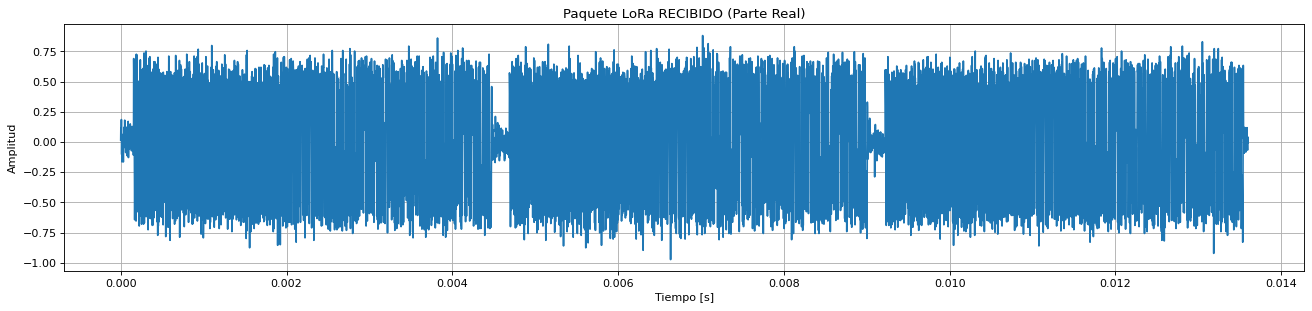

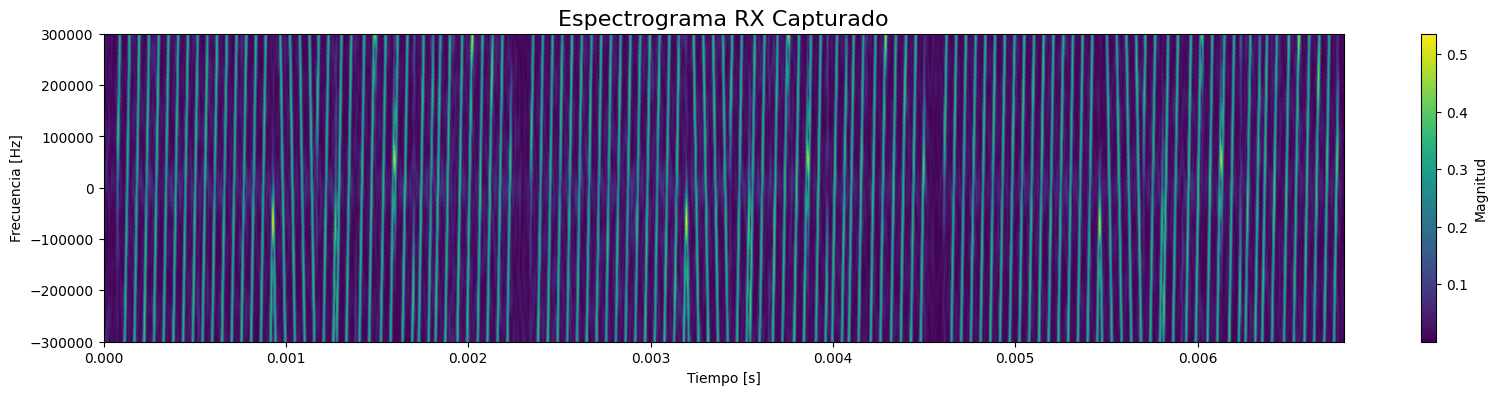

Iniciando Demodulación...
Símbolos recibidos: [[  6  90  47  21 119  33  69  38  26  20]
 [  6  90  47  21 119  33  69  38  26  20]
 [  6  90  47  21 119  33  69  38  38  23]]


In [22]:
# Cargamos el buffer de la transmision con el paquete creado anteriormente
data_tx = paquete * ((2**14)-1) 
sdr.tx(data_tx) 

# Damos tiempo al hardware para procesar el buffer y empezar a emitir
time.sleep(1)

# Por las dudas, limpiamos el buffer del RX
for i in range(10):
    discard = sdr.rx()

# Recibimos la señal
rx_raw = sdr.rx()

# Normalización (opcional, es obligatorio para el TX NO para el RX)
max_val = np.max(np.abs(rx_raw))
if max_val > 0:
    Rx_signal = rx_raw / max_val
else:
    Rx_signal = rx_raw
    print("Error: Señal recibida es todo ceros.")

tiempo_rx = np.arange(len(Rx_signal)) / BW


# Mostrar resultados
print(f"Símbolos transmitidos: {simbolos_payload}")

# Graficar señal recibida
# (Usando tus funciones de ploteo)
plot_waveform("Paquete LoRa RECIBIDO (Parte Real)", "Tiempo [s]", "Amplitud", tiempo_rx, np.real(Rx_signal))
plot_spectrogram(Rx_signal, BW, osf=osf, title='Espectrograma RX Capturado')

# DEMODULACIÓN
print("Iniciando Demodulación...")
simbolos_demodulados, cfo = demodulate(signal=Rx_signal, sf=SF, bw=BW, payload_len=len(simbolos_payload), osf=osf, zero_padding_factor=zero_padding_factor, preamble_len=NUM_CHIRPS_PREAMBULO,rf_freq=sdr.rx_lo)

print("Símbolos recibidos:", np.array(simbolos_demodulados))

In [23]:
def calcular_ber_sdr_simple(sdr, sf, bw, num_bits_per_packet, iteraciones, osf=2):
    print(f"\n Comenzando con curva de BER  ({iteraciones} capturas)")
    sdr.tx_destroy_buffer()

    # Configuración del SDR
    sdr.sample_rate = int(bw)
    sdr.tx_rf_bandwidth = int(bw)
    sdr.rx_rf_bandwidth = int(bw)
    sdr.gain_control_mode_chan0 = "slow_attack"
    sdr.rx_hardwaregain_chan0 = 0
    sdr.tx_hardwaregain_chan0 = -70

    # Generamos los bits a transmitir y creamos el paquete
    bits_tx = generador_hipotesis(num_bits_per_packet)
    simbolos_tx, bits_tx_con_padding = encoder_vector(bits_tx, sf)
    paquete, _, _ = crear_paquete_lora(simbolos_payload=simbolos_tx, sf=sf, bw=bw, num_preambulo=8, osf=1,sfd=True, delimitador=True )
    
    # Transmitimos la trama en un buffer circular
    sdr.tx_cyclic_buffer = True
    sdr.rx_buffer_size = int(len(paquete) * 4)  
    
    # La señal está normalizada en la creación de la waveform. La multiplicamos por este valor para aprovechar la maxima resolución del DAC
    data_tx = paquete * ((2**14)-1)
    sdr.tx(data_tx)
    
    # Esperamos que se estabilice el hardware (esto es opcional)
    for _ in range(50): sdr.rx()
    time.sleep(0.2)
        
    # 6. Medición
    total_errores = 0
    total_bits = 0
    paquetes_ok = 0
    len_tx_bits = len(bits_tx_con_padding)
    len_tx_sym = len(simbolos_tx)
    
    # Lista para graficar
    bits_por_iteracion = []

    for i in range(iteraciones):
        rx_raw = sdr.rx()

        # Normalización para el receptor (esto es opcional)
        max_val = np.max(np.abs(rx_raw))
        if max_val == 0: continue
        signal_rx = rx_raw / max_val  

        # Verificar calidad de la señal recibida
        print(f"SNR estimado RX: {10*np.log10(np.mean(np.abs(signal_rx)**2) / np.var(np.abs(signal_rx)**2)):.2f} dB")
        
        try:
            paquetes_demodulados, _ = demodulate(signal=signal_rx, sf=sf, bw=bw, payload_len=len_tx_sym, osf=osf, zero_padding_factor=4, preamble_len=8, rf_freq=sdr.rx_lo)
        except Exception as e:
            print(f"[!] Excepción en iter {i}: {e}")
            continue
            
        if not paquetes_demodulados or paquetes_demodulados == -1: 
            bits_por_iteracion.append(None)
            continue

        min_errores_iteracion = float('inf')
        mejor_paquete_valido = False
        
        for cand_simbolos in paquetes_demodulados:
            cand_simbolos = np.array(cand_simbolos, dtype=int)
            
            # Verificamos la longitud del paquete
            if len(cand_simbolos) != len_tx_sym: continue
            
            # Verificamos que no exista ningun simbolo fuera de rango
            if np.any(cand_simbolos < 0) or np.any(cand_simbolos >= 2**sf): continue
            
            # Convertimos a bits
            bits_rx = decimal_to_binary(cand_simbolos, sf)
            
            if len(bits_rx) == len_tx_bits:
                errores = np.sum(bits_tx_con_padding != bits_rx)
                
                # Elegimos el mejor candidato
                if errores < min_errores_iteracion:
                    min_errores_iteracion = errores
                    mejor_paquete_valido = True
                    
                    # Si encontramos uno perfecto (0 errores), paramos de buscar
                    if errores == 0:
                        break
        
        # Registramos el resultado
        if mejor_paquete_valido:
            if min_errores_iteracion > 0:
                print(f" [!] Iter {i}: Mejor candidato tuvo {min_errores_iteracion} errores.")
            
            total_errores += min_errores_iteracion
            total_bits += len_tx_bits
            paquetes_ok += 1
            
            bits_por_iteracion.append(min_errores_iteracion / len_tx_bits)
        else:
            bits_por_iteracion.append(None)

        #Grafico
        clear_output(wait=True)
        plt.figure(figsize=(10,5))
        plt.plot(bits_por_iteracion, marker='o')
        plt.xlabel("Iteración")
        plt.ylabel("BER por iteración")
        plt.title("Evolución del BER (real-time)")
        plt.grid(True)
        plt.show()

    # Cálculo final
    ber = total_errores / total_bits if total_bits > 0 else 0.0
    
    print("\n" + "="*50)
    print(f"Paquetes Validados: {paquetes_ok}/{iteraciones}")
    print(f"BER Final:          {ber:.10f}") 
    print("="*50 + "\n")
    
    sdr.tx_destroy_buffer()
    return ber

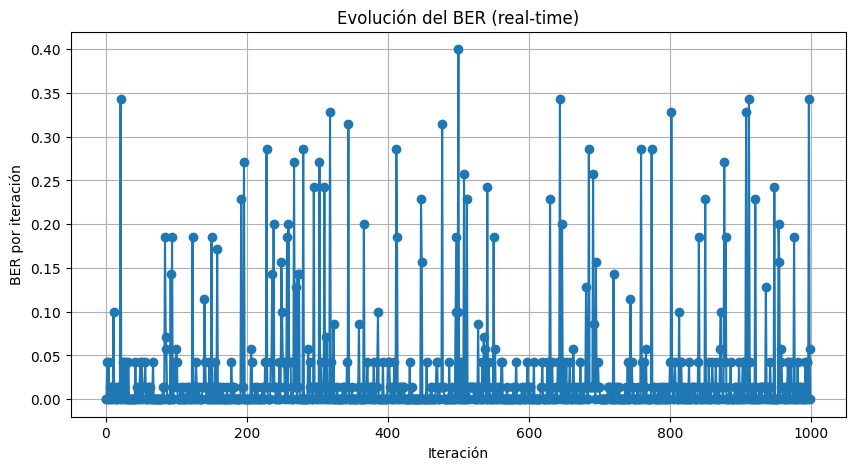


Paquetes Validados: 1000/1000
BER Final:          0.0235714286



In [24]:
# Hacemos el calculo
ber = calcular_ber_sdr_simple(sdr=sdr, sf=SF, bw=BW, num_bits_per_packet=70, iteraciones=1000, osf=osf)

In [25]:
# Since it is not possible to turn off Tx, it is configured to transmit at low power and on a different frequency than Rx.

sdr.tx_destroy_buffer()
sdr.tx_hardwaregain_chan0 = -89 
sdr.tx_lo                 = int(2400e6)
sdr.rx_lo                 = int(950e6)
sdr.tx(np.zeros(2048))


In [26]:
# Destroy radio object
del(sdr)

### Referencias

https://www.thethingsnetwork.org/docs/lorawan/lora-phy-format/

https://github.com/neon-iot/communication_labs/tree/main/waveformer_and_matched_filter/notebooks

https://wirelesspi.com/understanding-lora-phy-long-range-physical-layer/

fcefyn.aulavirtual.unc.edu.ar/pluginfile.php/873170/mod_resource/content/1/Frequency_Shift_Chirp_Modulation_The_LoRa_Modulation.pdf

https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem

https://pysdr.org/content/frequency_domain.html

https://github.com/neon-iot/communication_labs/blob/main/waveformer_and_matched_filter/notebooks/Interference_analysis_LoRa_FSK.ipynb

https://www.sciencedirect.com/topics/engineering/channel-impulse-response
